# PROBLEM STATEMENT

### LOAN ACCEPTED: If the company approves the loan, there are 3 possible scenarios described below:

1.Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

2.Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

3.Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset).

### OBJECTIVES OF THE CASE STUDY
1. Finding risky borrowers, those who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.
2. Understanding the driving factors (or driver variables) behind loan default, i.e. the variables that are strong indicators of default. 

# 1. Data Understanding

### To understand the data we would look answers for following 7 question:
    ### 1. How big is the data? - df.shape
    ### 2. How does the data look like? -  df.head() and df.sample()
    ### 3. What is the data type of each columns? - df.info()
    ### 4. Are there any missing values? - df.isnull().sum()
    ### 5. How does the data look mathematically? - df.describe()
    ### 6. Are there duplicate values? - df.duplicated().sum()
    ### 7. How is the correlation between the columns? - df.corr() #this during analysis part after data cleaning

In [237]:
#importing Libraries for data manipulation
import pandas as pd #dataframe
import numpy as np #numerical python
#importing Libraries for data visualization
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
import plotly.express as px #plotting
# Warnings library will be used to ignore some warnings
import warnings #warning
warnings.filterwarnings('ignore')

In [238]:
import pkg_resources

installed_packages = pkg_resources.working_set
for package in installed_packages:
    print(f"{package.key}=={package.version}")


automat==20.2.0
babel==2.11.0
bottleneck==1.3.7
brotli==1.0.9
flask==2.2.5
gitpython==3.1.37
heapdict==1.0.1
jinja2==3.1.3
markdown==3.4.1
markupsafe==2.1.3
protego==0.1.16
pydispatcher==2.0.5
pyjwt==2.4.0
pynacl==1.5.0
pyqt5==5.15.10
pyqt5-sip==12.13.0
pyqtwebengine==5.15.6
pysocks==1.7.1
pyyaml==6.0.1
pygments==2.15.1
qdarkstyle==3.0.2
qtawesome==1.2.2
qtpy==2.4.1
rtree==1.0.1
sqlalchemy==2.0.25
scrapy==2.8.0
send2trash==1.8.2
sphinx==5.0.2
unidecode==1.2.0
werkzeug==2.2.3
aiobotocore==2.7.0
aiohttp==3.9.3
aioitertools==0.7.1
aiosignal==1.2.0
alabaster==0.7.12
altair==5.0.1
anaconda-anon-usage==0.4.3
anaconda-catalogs==0.2.0
anaconda-client==1.12.3
anaconda-cloud-auth==0.1.4
anaconda-navigator==2.5.2
anaconda-project==0.11.1
anyio==4.2.0
appdirs==1.4.4
archspec==0.2.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
astroid==2.14.2
astropy==5.3.4
asttokens==2.0.5
async-lru==2.0.4
atomicwrites==1.4.0
attrs==23.1.0
autopep8==1.6.0
backports.functools-lru-cache==1.6.4
backp

In [4]:
#Reading provided data
loan_df=pd.read_csv(r'C:\Users\ADMIN\Desktop\Loan_Lending_CS\loan.csv')
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Checking data shape
print(loan_df.shape)

(39717, 111)


In [13]:
print('Number of Columns:',loan_df.shape[1])
print('Number of Rows:',loan_df.shape[0])

Number of Columns: 111
Number of Rows: 39717


In [14]:
#How does data look
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loan_df.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
7465,876617,1091242,14500,14500,13000.0,60 months,11.71%,320.43,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
#Data type of columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [16]:
# Data types of each column
print(loan_df.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [17]:
#Looking at the data mathematically
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Check if there are any duplicate rows.
duplicate_rows = len(loan_df[loan_df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

In [11]:
#Check missing values in df
(loan_df.isnull().sum()*100)/len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

# 2. Data Cleaning and Manipulation

#### 2.1 Removing Null Values from the Dataset

In [18]:
# Checking column with large amount of null values(in percentage) and irrelevant columns
print((loan_df.isnull().sum()/loan_df.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [19]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
loan_df = loan_df.loc[:,loan_df.isnull().sum()/loan_df.shape[0]*100<50]
# Shape of the dataframe after removing columns
print(loan_df.shape)

(39717, 54)


In [23]:
# Checking columns again for null value percentage
print((loan_df.isnull().sum()/loan_df.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [24]:
# Deleting the rows which is having all values as na.
loan_df = loan_df.dropna(axis=0, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


#### 2.2 Removing Irrelevant Data from Dataset

In [25]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
loan_df=loan_df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
# Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
loan_df=loan_df.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
loan_df=loan_df.drop(['zip_code'],axis=1)
# Removing member_id as it is a duplicate index column and is not required for the analysis
loan_df=loan_df.drop(['member_id'],axis=1)
# Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
loan_df=loan_df.drop(['funded_amnt_inv'],axis=1)
# Shape of the dataframe after removing columns
print(loan_df.shape)

(39717, 26)


In [26]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(loan_df.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [28]:
# Removing columns with just 1 unique value
loan_df = loan_df.loc[:,loan_df.nunique()>1]
# Shape of the dataframe after removing columns
print(loan_df.shape)

(39717, 18)


In [46]:
# Removing loans with status as 'Current'
loan_df = loan_df[loan_df.loan_status!='Current']
# Shape of the dataframe after removing columns
print(loan_df.shape)

(37544, 18)


#### 2.3 Fixing Null Values

In [47]:
# Checking for missing values across the dataframe
print(loan_df.isnull().sum().sort_values(ascending=False))

id                      0
loan_amnt               0
dti                     0
addr_state              0
purpose                 0
loan_status             0
issue_d                 0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
funded_amnt             0
pub_rec_bankruptcies    0
dtype: int64


In [48]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_df.emp_length.value_counts())

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64


In [49]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_df.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    36009
1.0     1530
2.0        5
Name: count, dtype: int64


In [50]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_df.emp_length.value_counts())

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64


In [51]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_df.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    36009
1.0     1530
2.0        5
Name: count, dtype: int64


In [52]:
# Removing null values in emp_title and emp_length columns
loan_df = loan_df.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan_df.shape)

(37544, 18)


In [53]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)

In [54]:
# Checking for missing values across the dataframe
print(loan_df.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


#### 2.3 Correcting Data Type

In [59]:
# Checking information about the dataframe
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37544 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37544 non-null  int64  
 1   loan_amnt             37544 non-null  int64  
 2   term                  37544 non-null  object 
 3   int_rate              37544 non-null  object 
 4   grade                 37544 non-null  object 
 5   sub_grade             37544 non-null  object 
 6   emp_length            37544 non-null  object 
 7   home_ownership        37544 non-null  object 
 8   verification_status   37544 non-null  object 
 9   annual_inc            37544 non-null  float64
 10  loan_status           37544 non-null  object 
 11  purpose               37544 non-null  object 
 12  addr_state            37544 non-null  object 
 13  dti                   37544 non-null  float64
 14  pub_rec_bankruptcies  37544 non-null  float64
 15  issue_d               37

In [58]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan_df = loan_df[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_d']]
# Shape of the dataframe after removing columns
loan_df.shape

(37544, 16)

In [60]:
#converting issue_d`to date type
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]

In [62]:
loan_df['issue_year']=pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.year
loan_df['issue_month']=pd.to_datetime(loan_df.issue_d,format='%b-%y').dt.month

In [63]:
#converting employee length
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_df['emp_length']=loan_df['emp_length'].apply(lambda x : strip_emp_length(x) )
print(loan_df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 37544, dtype: object


In [68]:
# Ensure all values in the interest rate column are strings
loan_df['int_rate'] = loan_df['int_rate'].astype(str)

# Clean the interest rate column
def clean_interest_rate(rate_str):
    if isinstance(rate_str, str):
        return float(rate_str.replace('%', '').strip())
    return rate_str

loan_df['int_rate'] = loan_df['int_rate'].apply(clean_interest_rate)

In [71]:
# Convert the column loan_funded_amnt as float64
loan_df = loan_df.astype({'loan_amnt':'float'})
loan_df

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,annual_inc,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d,issue_year,issue_month
0,1077501,5000.0,36,10.65,B,B2,10,RENT,Verified,24000.0,Fully Paid,credit_card,AZ,27.65,0.0,2011-12-01,2011,12
1,1077430,2500.0,60,15.27,C,C4,1,RENT,Source Verified,30000.0,Charged Off,car,GA,1.00,0.0,2011-12-01,2011,12
2,1077175,2400.0,36,15.96,C,C5,10,RENT,Not Verified,12252.0,Fully Paid,small_business,IL,8.72,0.0,2011-12-01,2011,12
3,1076863,10000.0,36,13.49,C,C1,10,RENT,Source Verified,49200.0,Fully Paid,other,CA,20.00,0.0,2011-12-01,2011,12
5,1075269,5000.0,36,7.90,A,A4,3,RENT,Source Verified,36000.0,Fully Paid,wedding,AZ,11.20,0.0,2011-12-01,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,36,8.07,A,A4,4,MORTGAGE,Not Verified,110000.0,Fully Paid,home_improvement,CO,11.33,0.0,2007-07-01,2007,7
39713,90665,8500.0,36,10.28,C,C1,3,RENT,Not Verified,18000.0,Fully Paid,credit_card,NC,6.40,0.0,2007-07-01,2007,7
39714,90395,5000.0,36,8.07,A,A4,1,MORTGAGE,Not Verified,100000.0,Fully Paid,debt_consolidation,MA,2.30,0.0,2007-07-01,2007,7
39715,90376,5000.0,36,7.43,A,A2,1,MORTGAGE,Not Verified,200000.0,Fully Paid,other,MD,3.72,0.0,2007-07-01,2007,7


In [75]:
def clean_term(term_str):
    if isinstance(term_str, str):
        return float(term_str.replace(' months', '').strip())
    return term_str

loan_df['term'] = loan_df['term'].astype(str).apply(clean_term)

In [76]:
# Correcting data type for rest all with type category in the dataframe
## Derving more columns with the conversion of data type
loan_df.grade=loan_df.grade.astype('category')
loan_df.sub_grade=loan_df.sub_grade.astype('category')
loan_df.home_ownership=loan_df.home_ownership.astype('category')
loan_df.verification_status=loan_df.verification_status.astype('category')
loan_df.purpose=loan_df.purpose.astype('category')
loan_df.addr_state=loan_df.addr_state.astype('category')

In [110]:
columns=loan_df[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
loan_df.shape

(37173, 22)

In [98]:
# Divding the column as per categorical and numerical
categorical_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
continous_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

#### 2.4 Removing Outliers

In [79]:
# Checking outlier values in continuous columns via box plot
## The continuous columns are loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies
## We will check outlier using box plot and then remove the outliers as per requirement

In [100]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_df['loan_amnt_b'] = loan_df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)


In [101]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_b'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [102]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['int_rate_b'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [103]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['dti_b'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [104]:
# Univarients function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

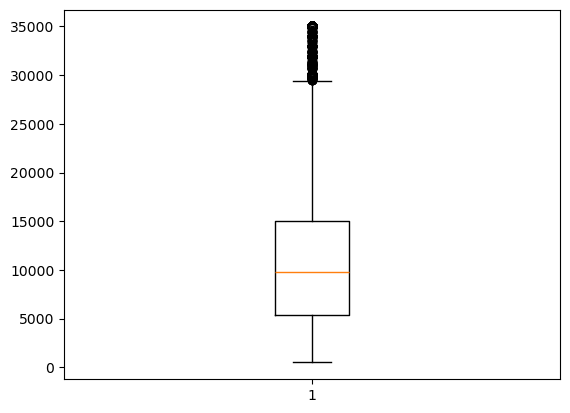

In [105]:
plt.boxplot(loan_df['loan_amnt'],)
plt.show()

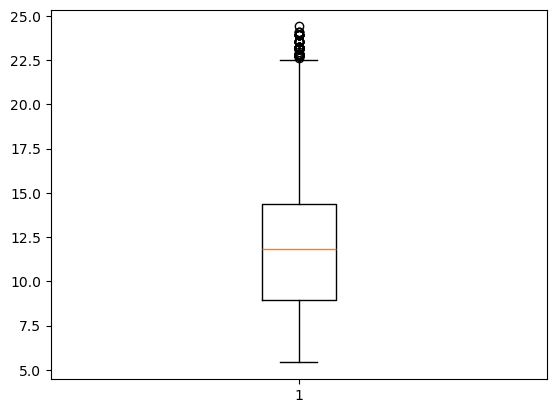

In [106]:
plt.boxplot(loan_df['int_rate'])
plt.show()

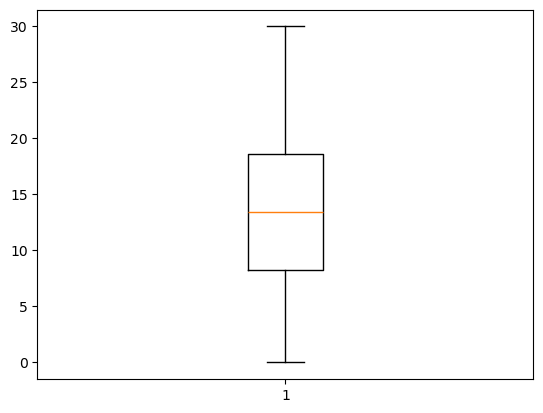

In [107]:
plt.boxplot(loan_df['dti'])
plt.show()

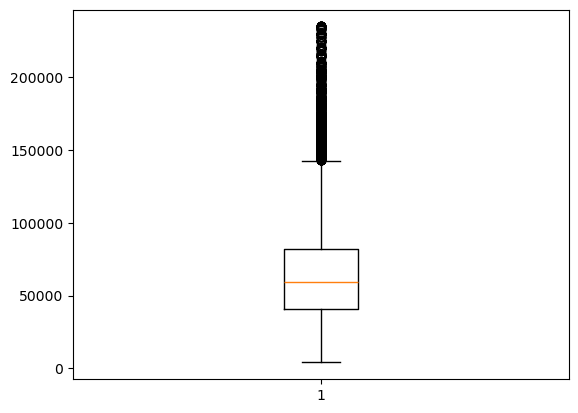

In [108]:
plt.boxplot(loan_df['annual_inc'])
plt.show()

In [99]:
loan_df = loan_df[loan_df.annual_inc<=np.percentile(loan_df.annual_inc,99)]

# 3. Data Analysis

### 3.1 Univariate Analysis

It can be defined as single variable analysis where each column of data can act as a variable


Analysis for id:
count    3.717300e+04
mean     6.743156e+05
std      2.098519e+05
min      5.473400e+04
25%      5.093440e+05
50%      6.535760e+05
75%      8.266620e+05
max      1.077501e+06
Name: id, dtype: float64


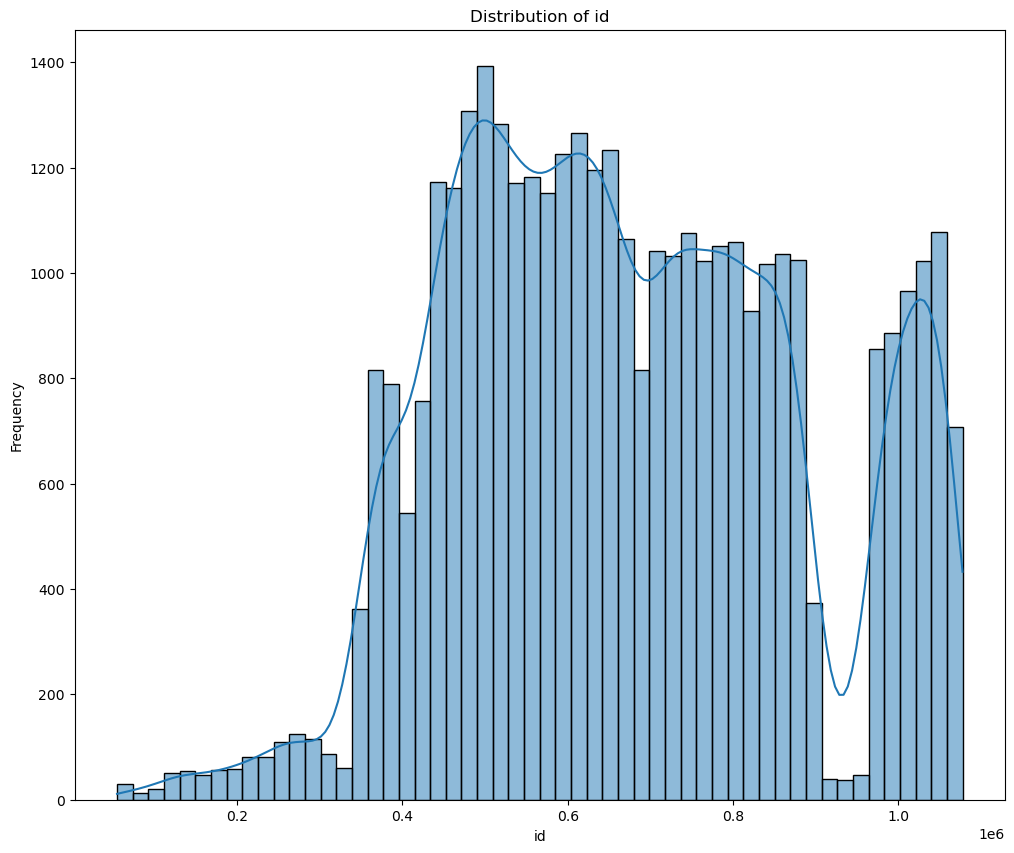


Analysis for loan_amnt:
count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


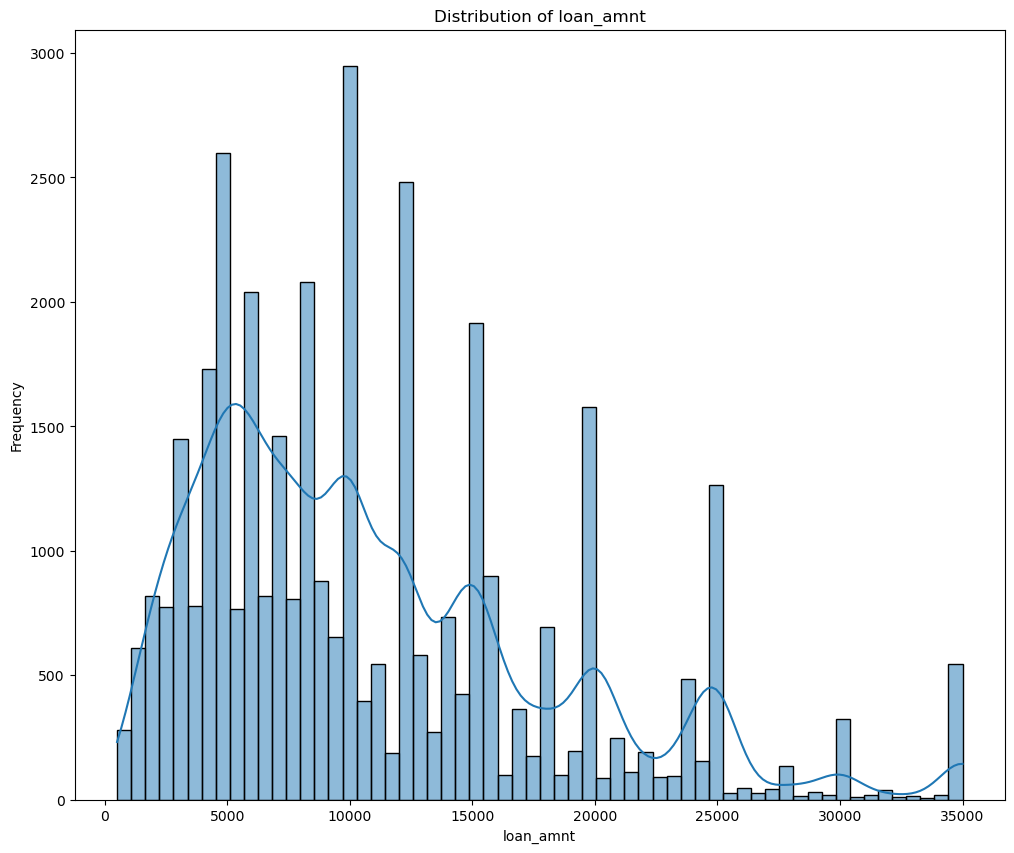


Analysis for term:
count    37173.000000
mean        41.909450
std         10.339636
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64


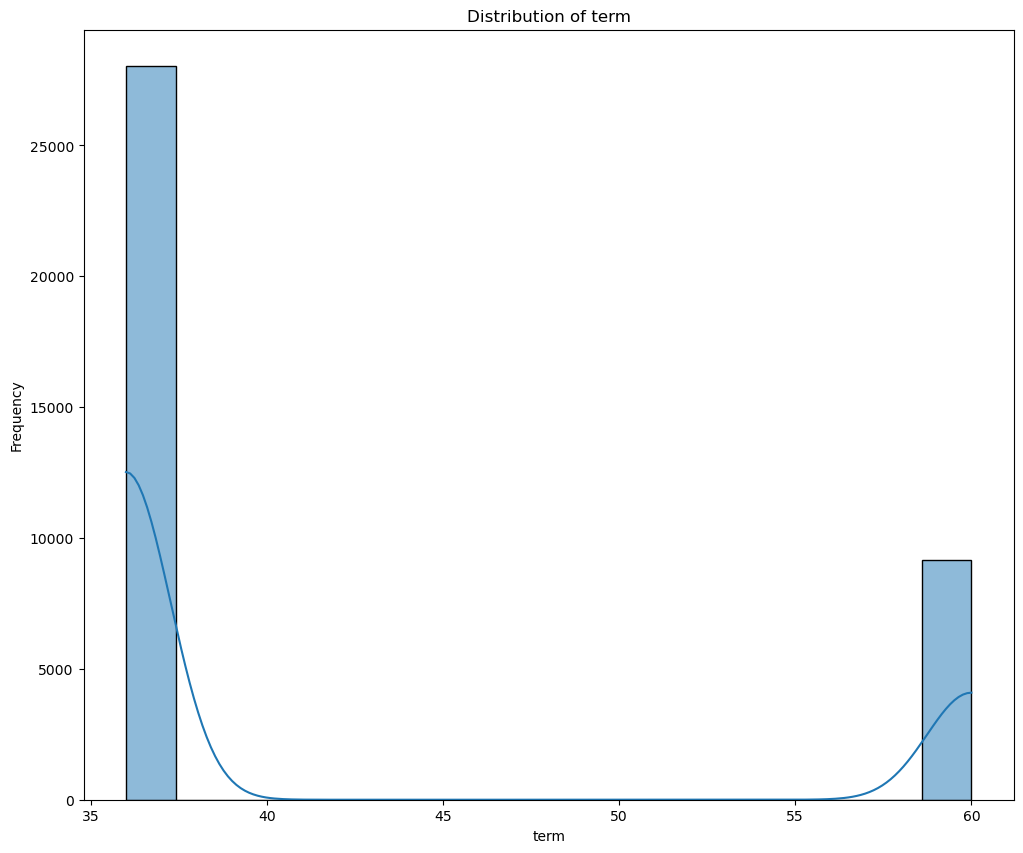


Analysis for int_rate:
count    37173.000000
mean        11.949716
std          3.675598
min          5.420000
25%          8.940000
50%         11.830000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64


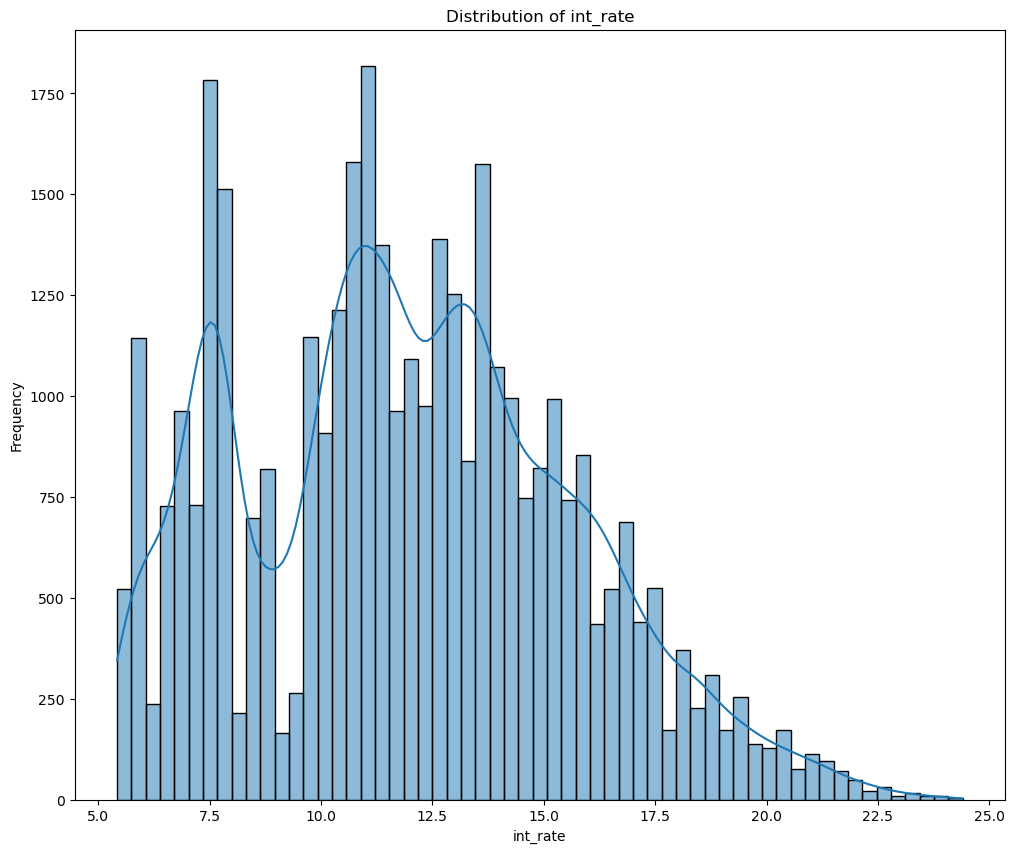


Analysis for grade:
count     37173
unique        7
top           B
freq      11268
Name: grade, dtype: object


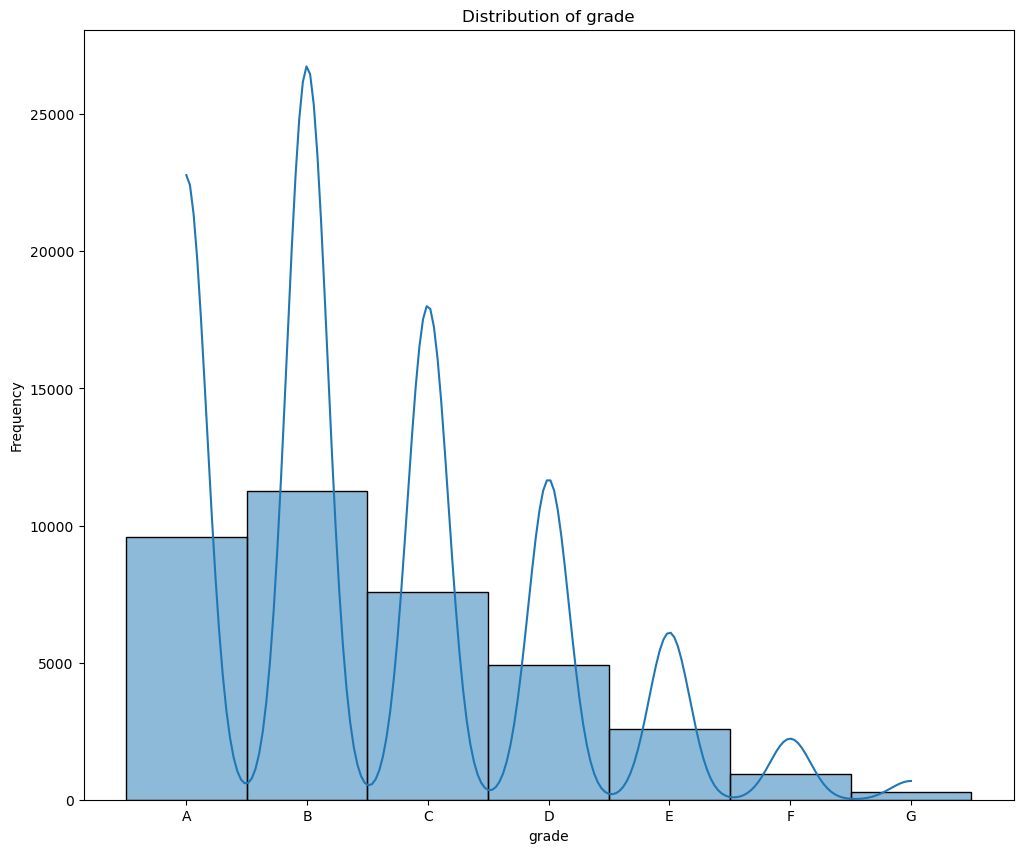


Analysis for sub_grade:
count     37173
unique       35
top          A4
freq       2773
Name: sub_grade, dtype: object


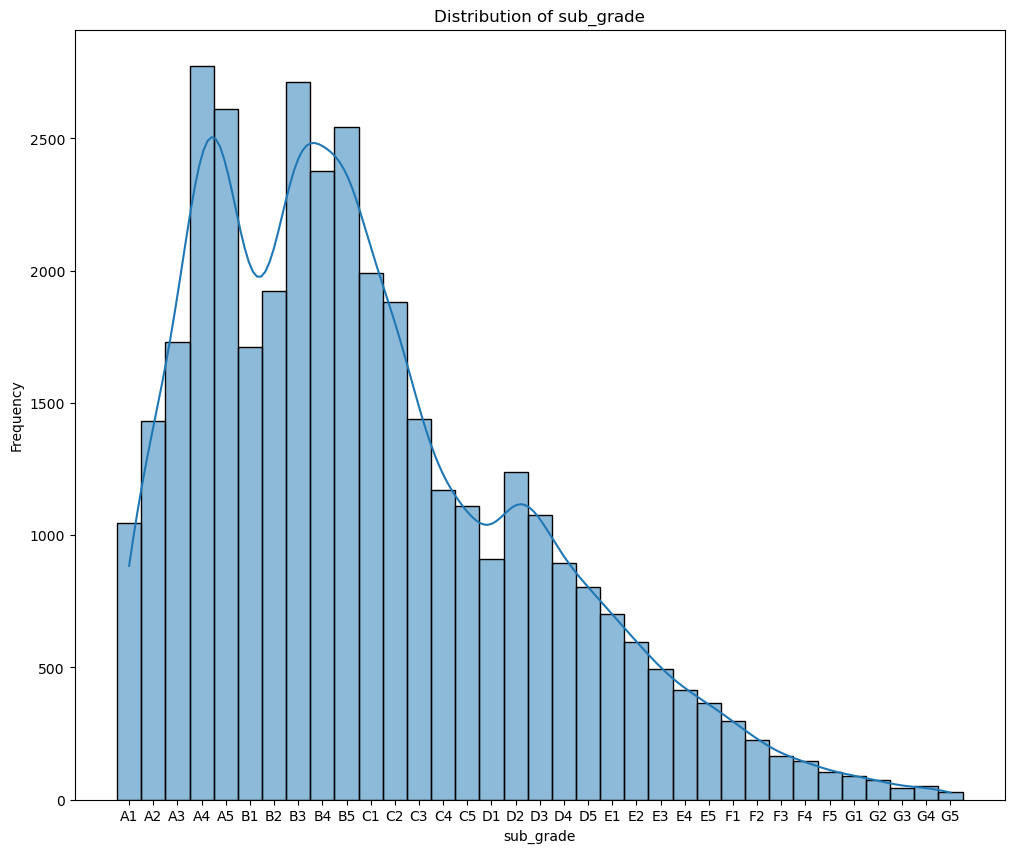


Analysis for emp_length:
count     37173
unique       10
top          10
freq       8354
Name: emp_length, dtype: object


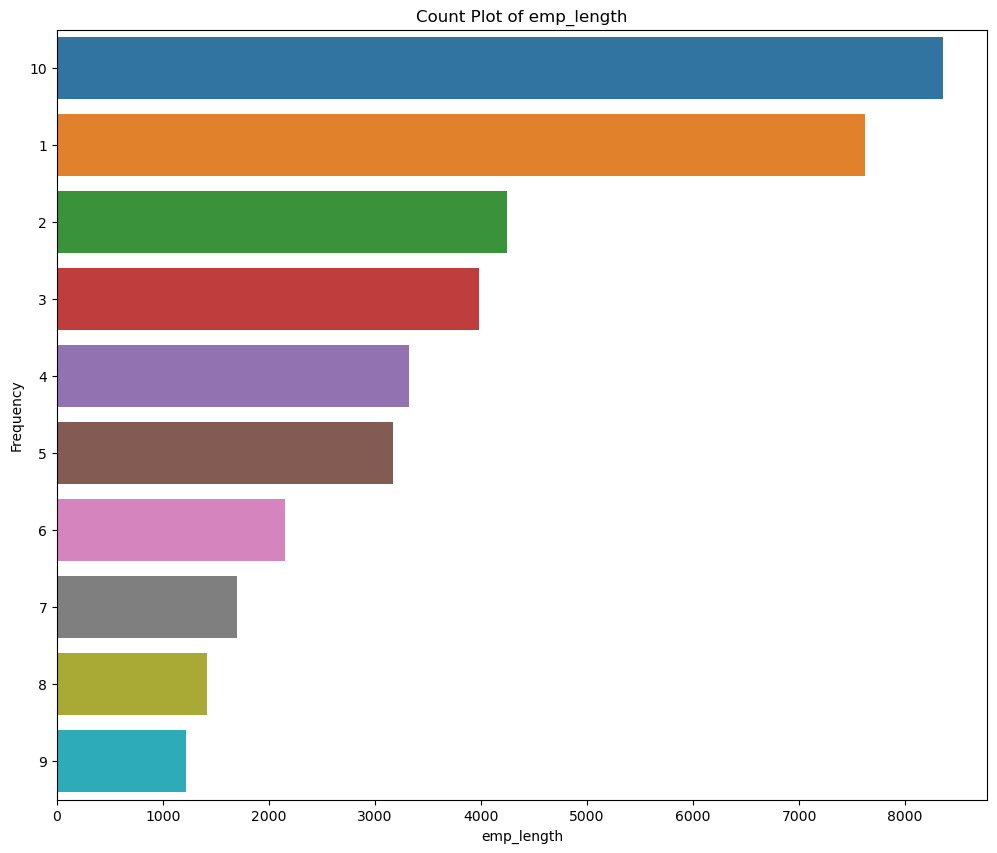


Analysis for home_ownership:
count     37173
unique        5
top        RENT
freq      17999
Name: home_ownership, dtype: object


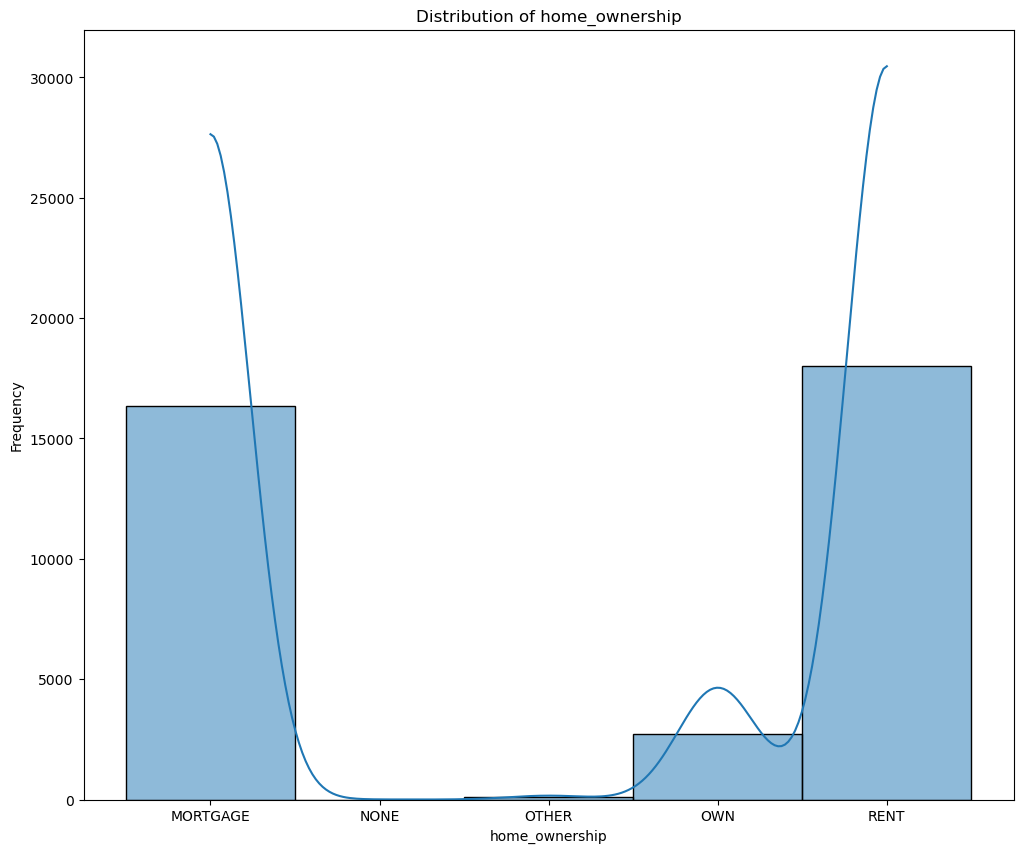


Analysis for verification_status:
count            37173
unique               3
top       Not Verified
freq             16192
Name: verification_status, dtype: object


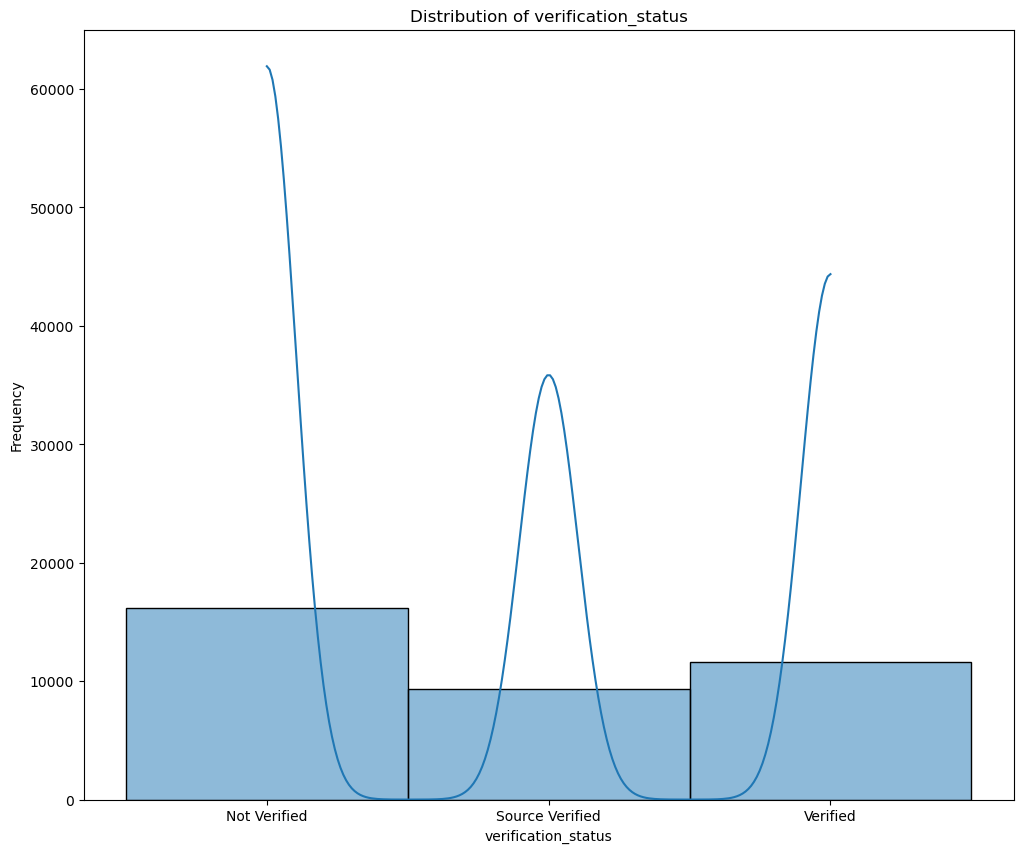


Analysis for annual_inc:
count     37173.000000
mean      65939.461555
std       35236.990734
min        4000.000000
25%       40944.000000
50%       59000.000000
75%       81708.000000
max      235000.000000
Name: annual_inc, dtype: float64


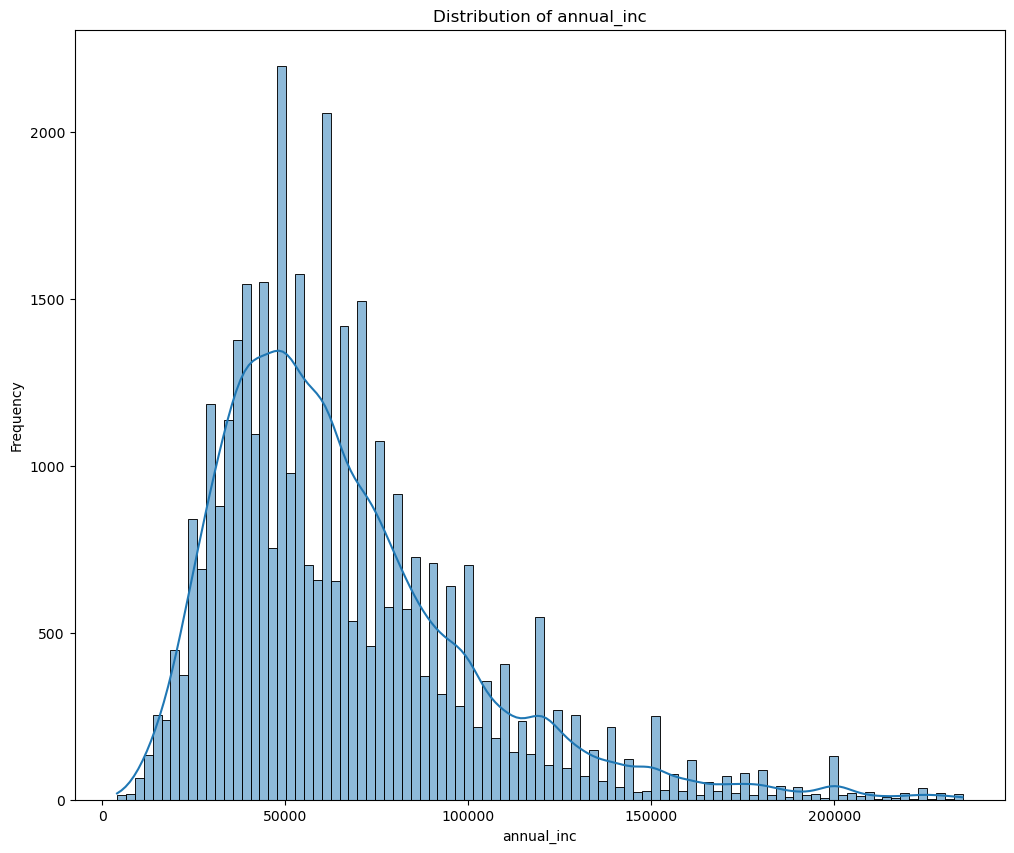


Analysis for loan_status:
count          37173
unique             2
top       Fully Paid
freq           31813
Name: loan_status, dtype: object


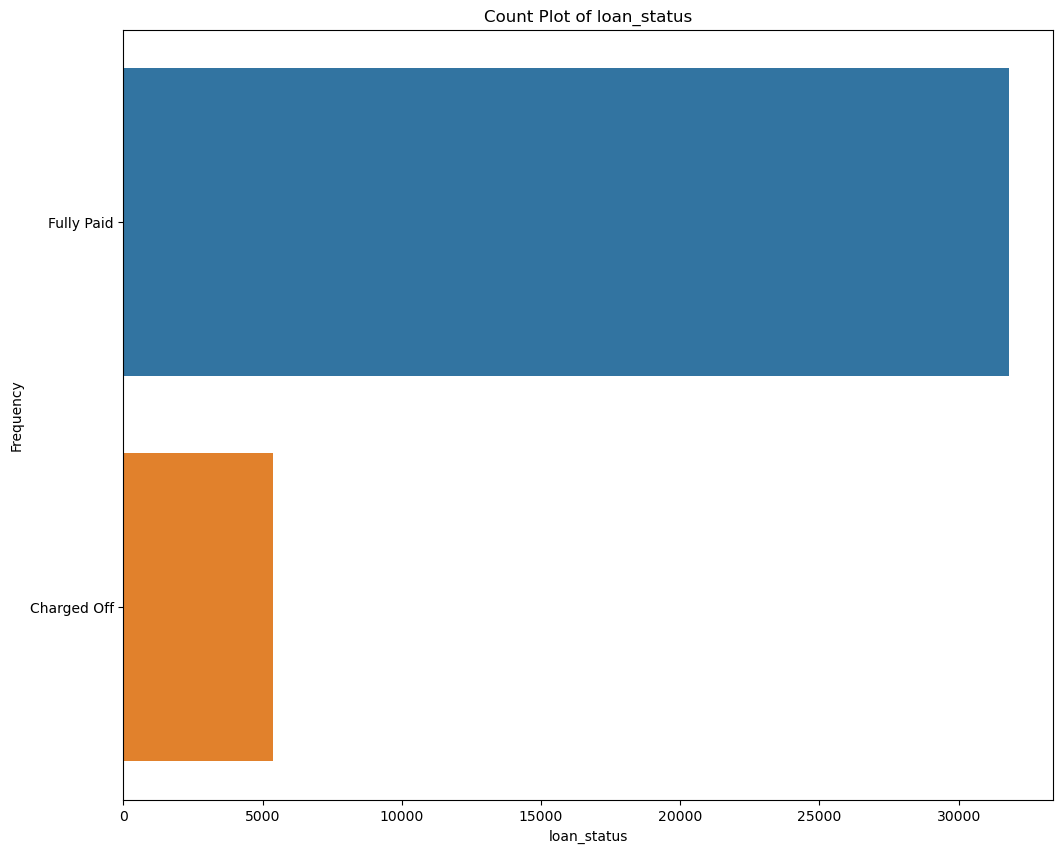


Analysis for purpose:
count                  37173
unique                    14
top       debt_consolidation
freq                   17540
Name: purpose, dtype: object


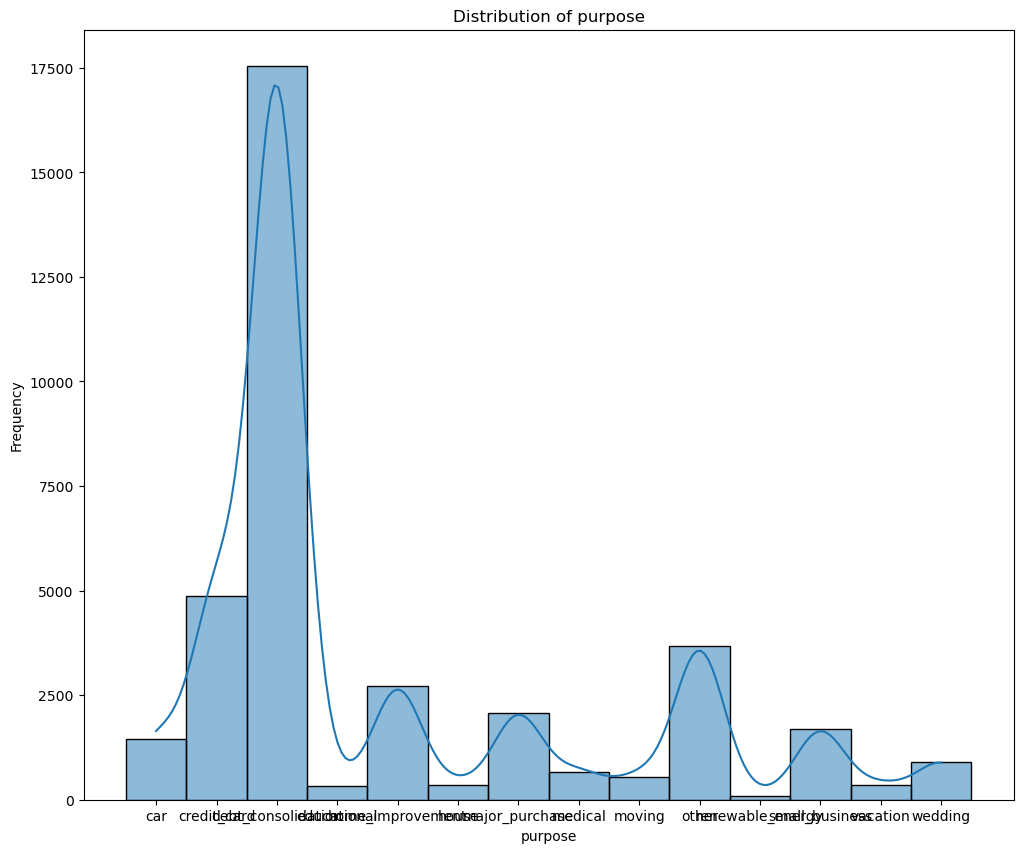


Analysis for addr_state:
count     37173
unique       50
top          CA
freq       6703
Name: addr_state, dtype: object


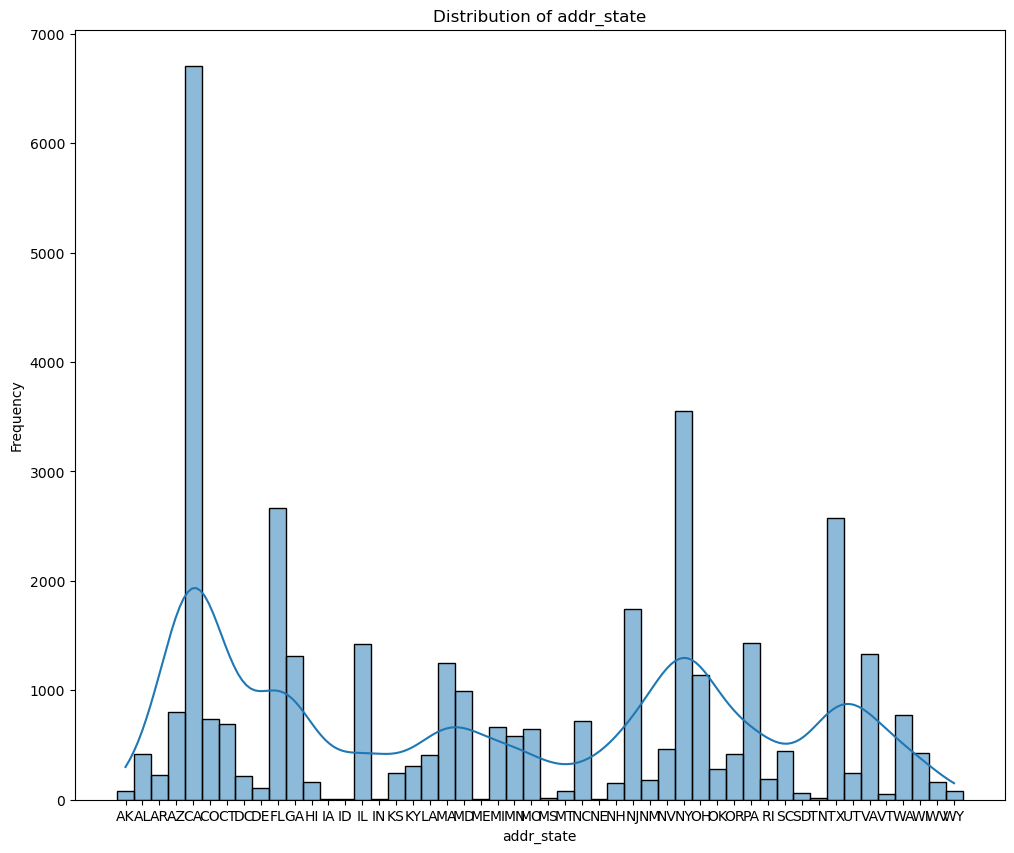


Analysis for dti:
count    37173.000000
mean        13.344551
std          6.644839
min          0.000000
25%          8.240000
50%         13.450000
75%         18.590000
max         29.990000
Name: dti, dtype: float64


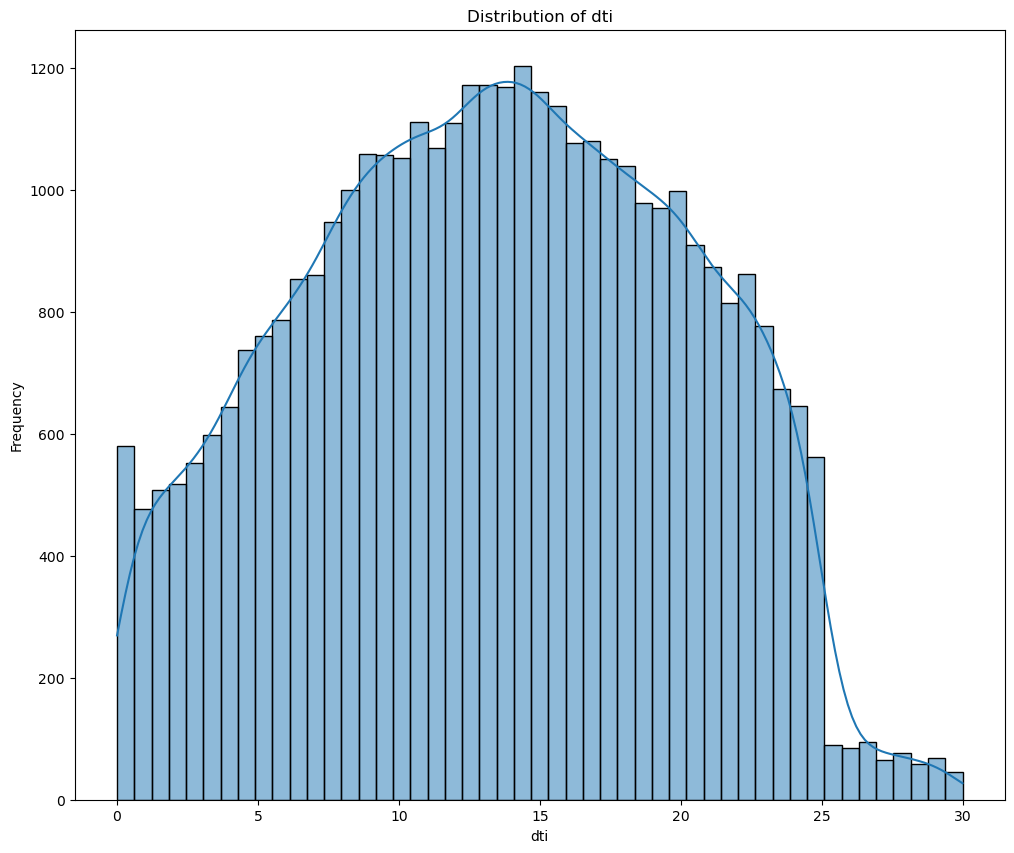


Analysis for pub_rec_bankruptcies:
count    37173.000000
mean         0.041320
std          0.199707
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


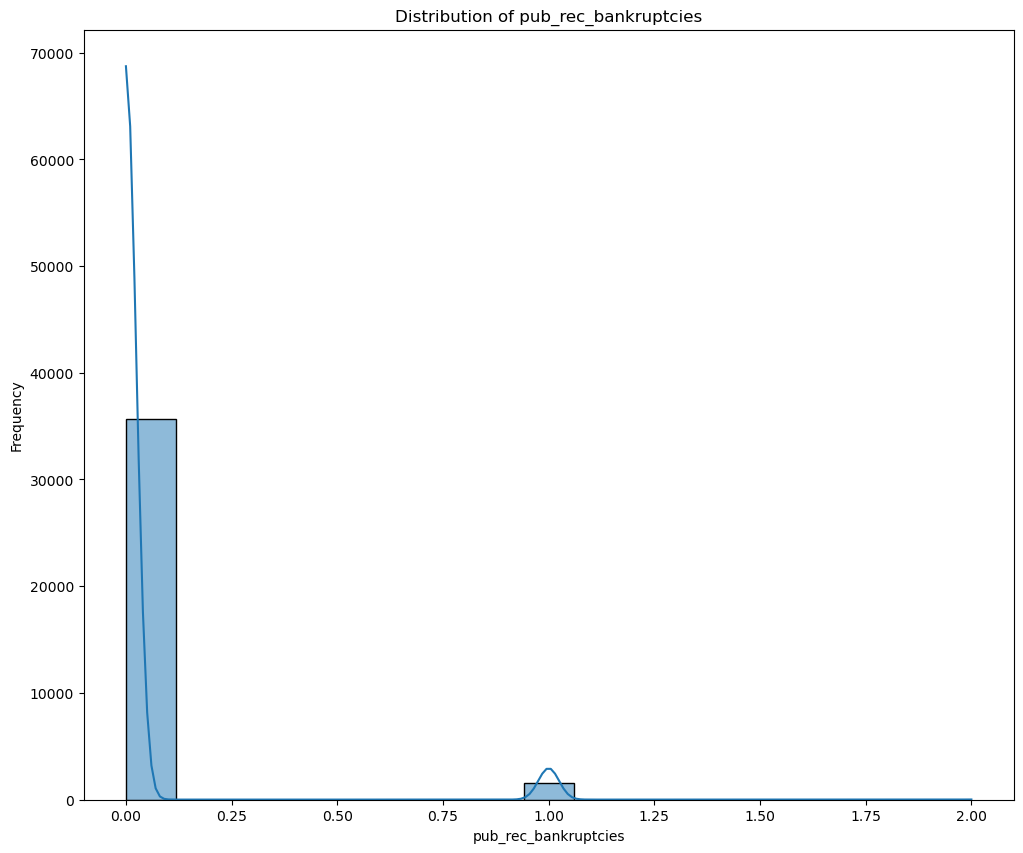


Analysis for issue_year:
count    37173.000000
mean      2010.298550
std          0.889195
min       2007.000000
25%       2010.000000
50%       2011.000000
75%       2011.000000
max       2011.000000
Name: issue_year, dtype: float64


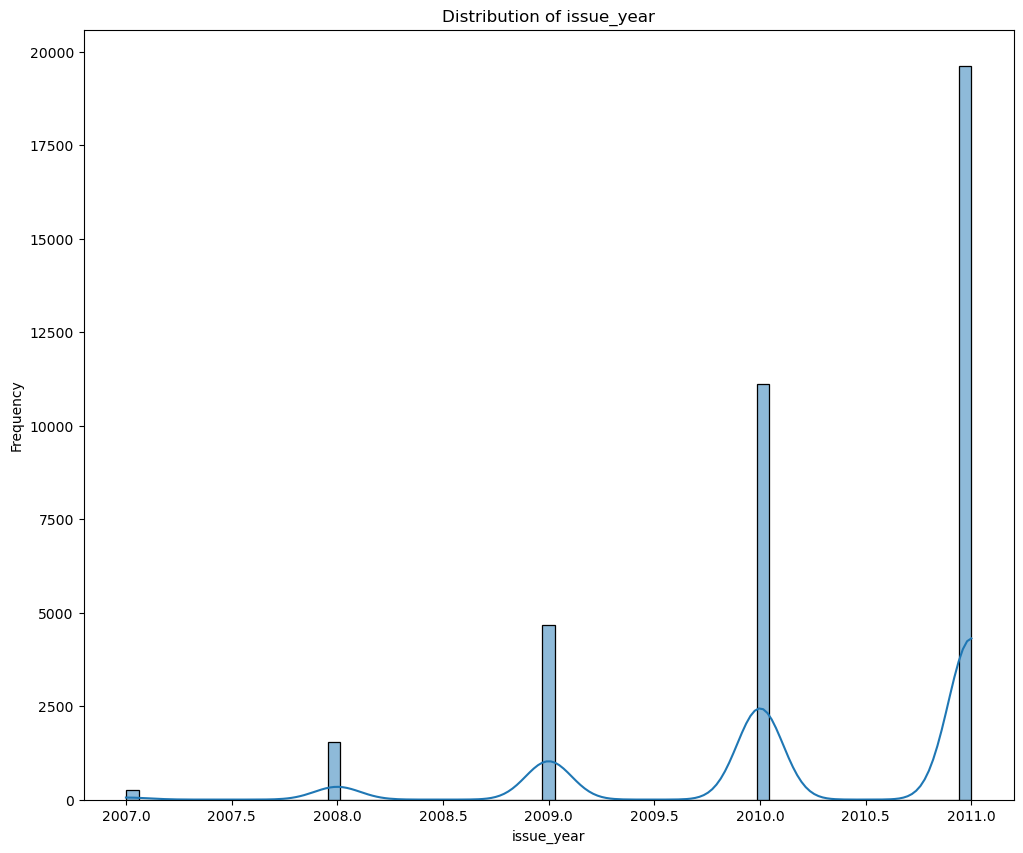


Analysis for issue_month:
count    37173.000000
mean         7.112340
std          3.410099
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: issue_month, dtype: float64


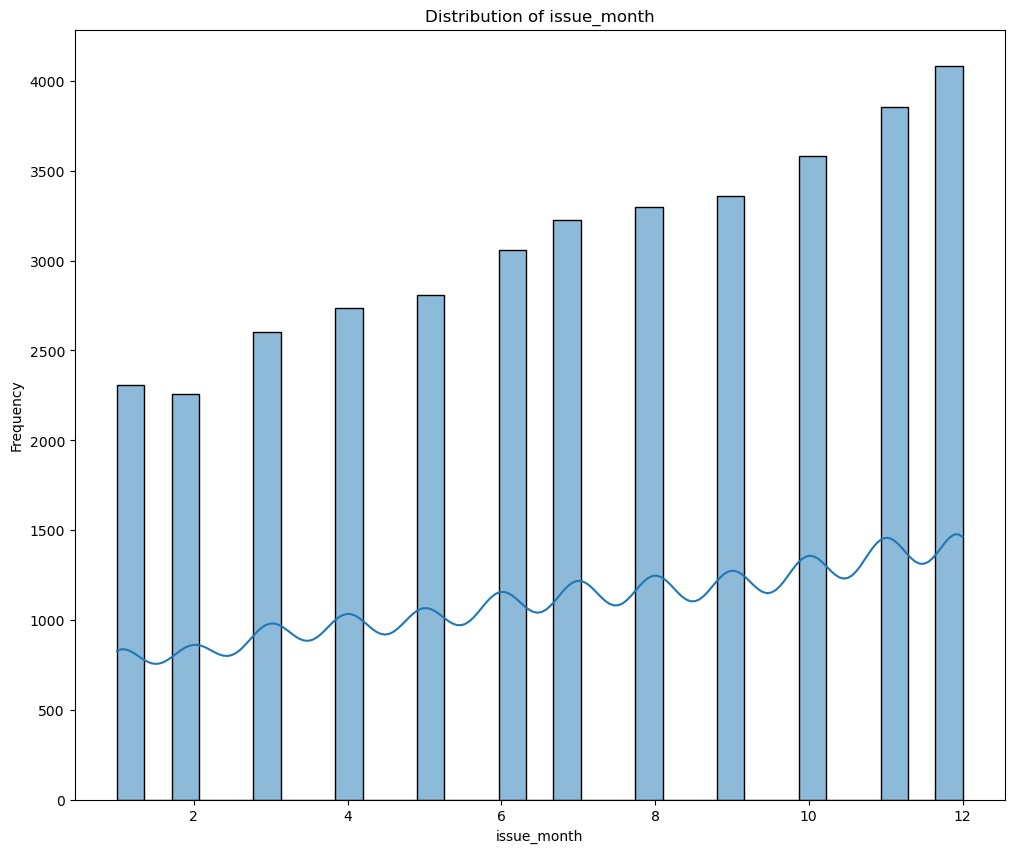

In [112]:
def univariate_analysis(loan_df, columns):
    for column in columns:
        print(f"\nAnalysis for {column}:")
        
        # Summary statistics
        print(loan_df[column].describe(include='all'))
        
        # Plot
        plt.figure(figsize=(12, 10))
        
        if loan_df[column].dtype == 'object':
            sns.countplot(y=loan_df[column], order=loan_df[column].value_counts().index)
            plt.title(f'Count Plot of {column}')
        else:
            sns.histplot(loan_df[column], kde=True)
            plt.title(f'Distribution of {column}')
        
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Perform univariate analysis
univariate_analysis(loan_df, columns)

### Univariate Analysis Observations:
    1. Most borrowers live on rent.
    2. Most no. of loans were issued in month of December.
    3. Most loans were issued in year 2011.
    4. Most borrowers don't have bankcorruptcy record.
    5. Mean DTI for borrowers is 13.44
    6.Borrowers from California recorded highest dti.
    7. Most customers borrow for debt consolidation.
    8. Charged off or defaulty borrowers arevery less when compared to fully paid.
    9. Average annual income of borrower is 65939.461555 while maximum recorded income is 2,35,000 USD.
    10. Most borrowers are not verified by lenders.
    11. Maximum no. of borrowers have employement for 10 years.
    12. A4 is highest recorded sub grade while B is highest recorded grade.
    13. Average interest rate is 11.94 %.

## 3.2 Segmented Univariate Analysis

In segmented analysis we will find categorical variables and bucket our data. We further compare averages and business driven metrics.

In [116]:
# Divding the column as per categorical and numerical
categorical_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
continous_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

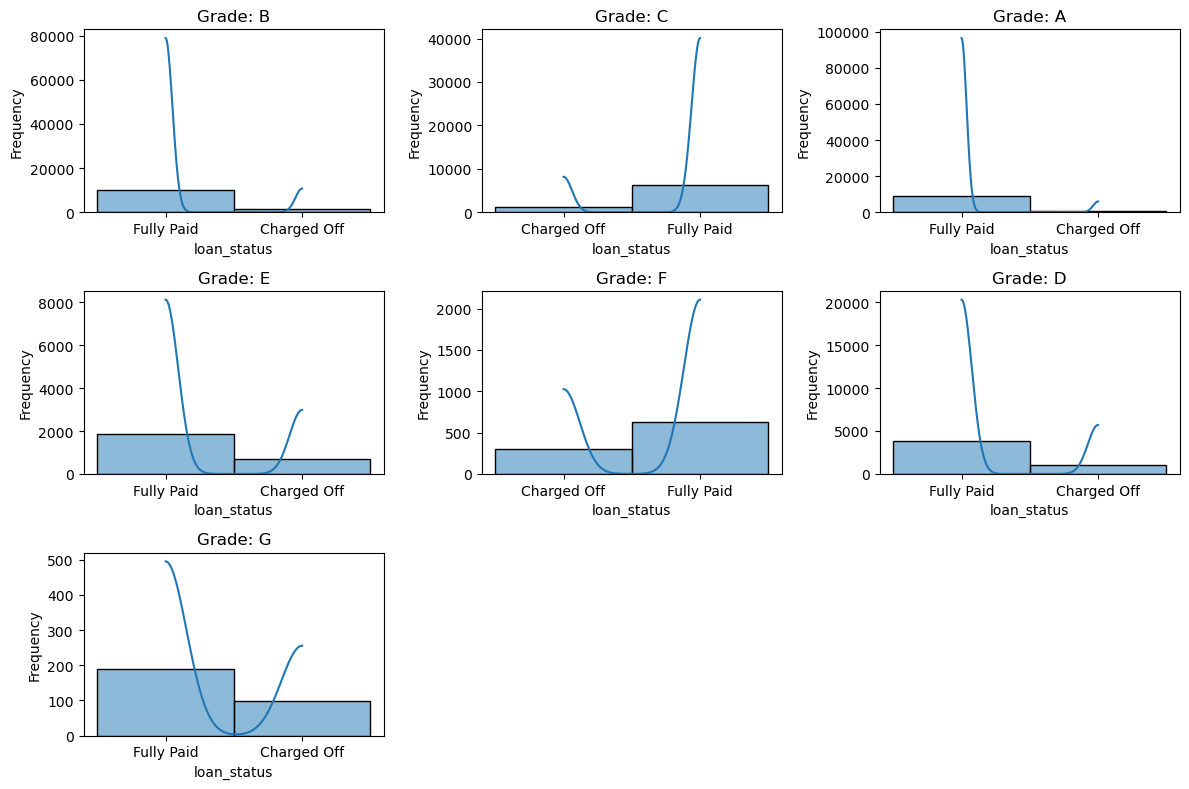

In [133]:
# Segmentation for grade variable
category_cols = 'grade'  

result_cols = 'loan_status'

# Unique segments
segments = loan_df[category_cols].unique()

# Set up the figure for plotting
plt.figure(figsize=(12, 8))

# Perform univariate analysis for each segment
for i, segment in enumerate(segments, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid size if needed
    segment_data = loan_df[loan_df[category_cols] == segment]
    sns.histplot(segment_data[result_cols], kde=True)
    plt.title(f'Grade: {segment}')
    plt.xlabel(result_cols)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

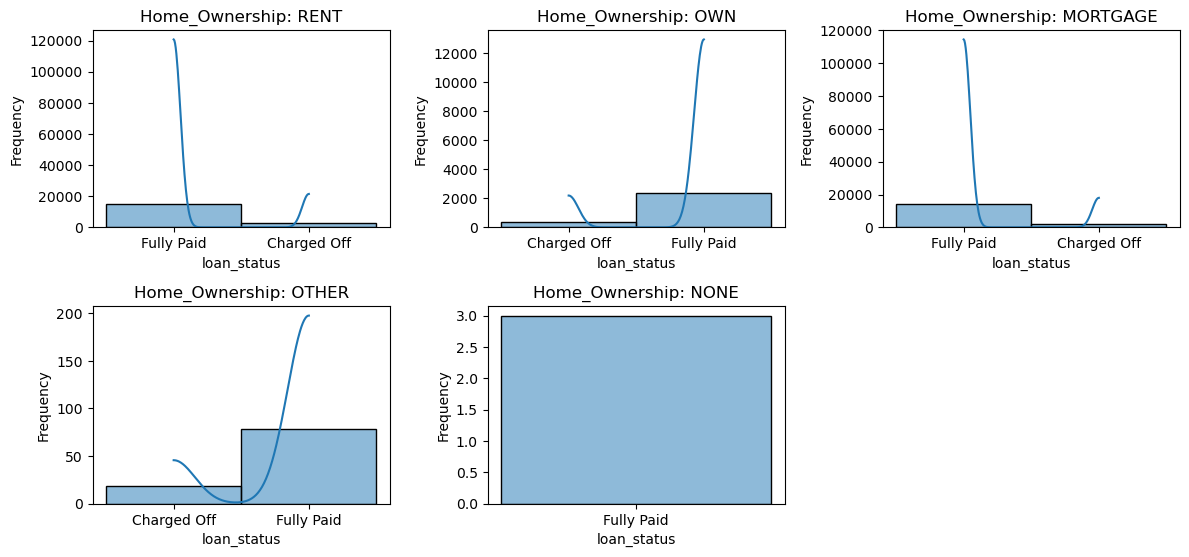

In [134]:
# Segmentation for home_ownership variable
category_cols = 'home_ownership'  

result_cols = 'loan_status'

# Unique segments
segments = loan_df[category_cols].unique()

# Set up the figure for plotting
plt.figure(figsize=(12, 8))

# Perform univariate analysis for each segment
for i, segment in enumerate(segments, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid size if needed
    segment_data = loan_df[loan_df[category_cols] == segment]
    sns.histplot(segment_data[result_cols], kde=True)
    plt.title(f'Home_Ownership: {segment}')
    plt.xlabel(result_cols)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

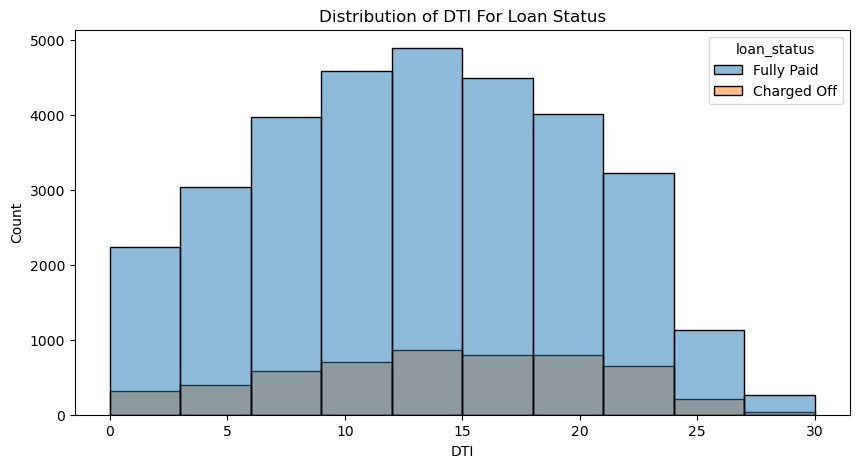

In [132]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

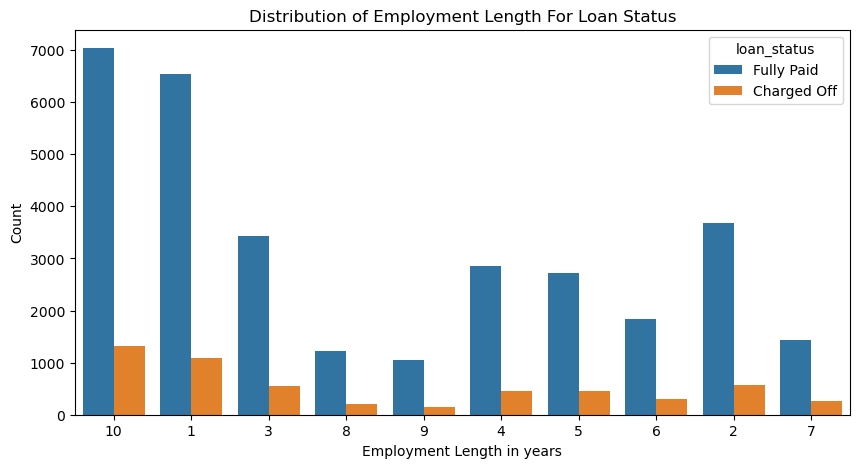

In [136]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

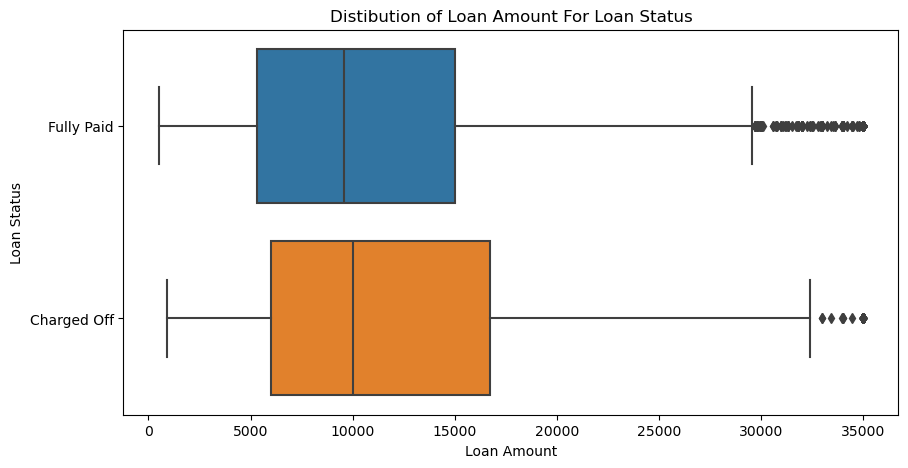

In [135]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

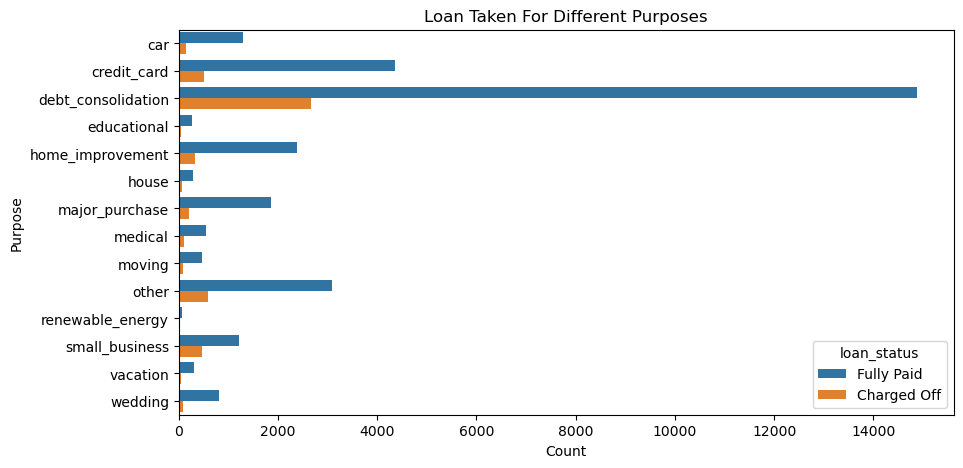

In [131]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

### Segmented Univariate Analysis observation:

    1.Although most of the time lon is taken by borrower for debt consolidation but most borrower have fully paid it.
    2.People with no home ownership has no charged o0ff borrowers.
    3.Grade A employees hardly have any risky borrower and mostly pay the loan on time.
    4.The loans in DTI ratio 10-15 have higher number of defaulted loan.

## 3.3 Bivariate Analysis

To analyze who could be risky borrowers or charged off using the Lending Club dataset, we need to focus on the loan_status column as the outcome variable. We can perform bivariate analysis by examining the relationships between loan_status and other categorical and continuous variables to identify patterns that might indicate higher risk.

In [141]:
# Divding the column as per categorical and numerical
categorical_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
continous_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

In [229]:
#Relationship between continuous column variables and loan status

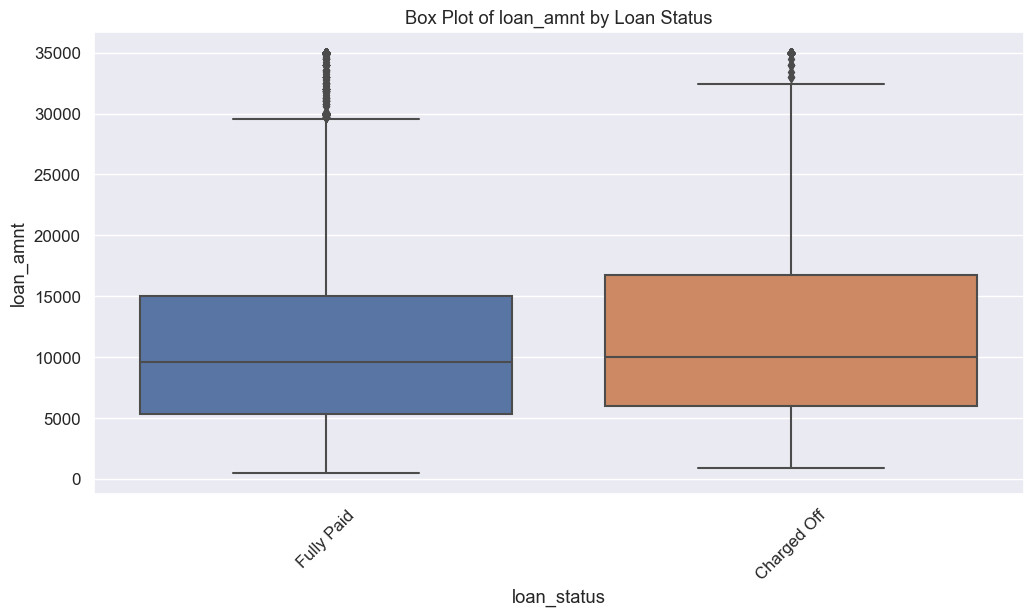

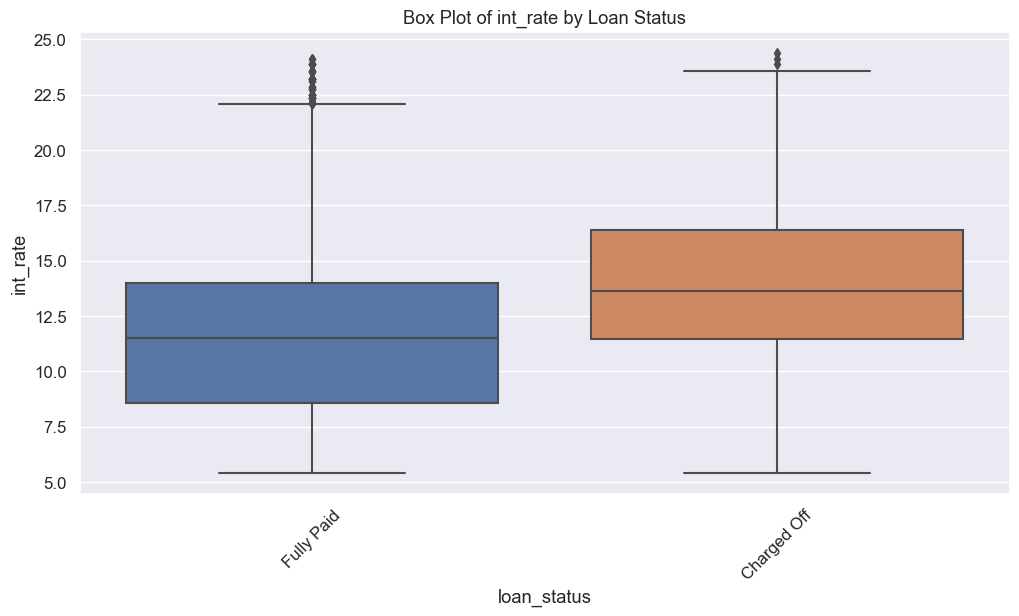

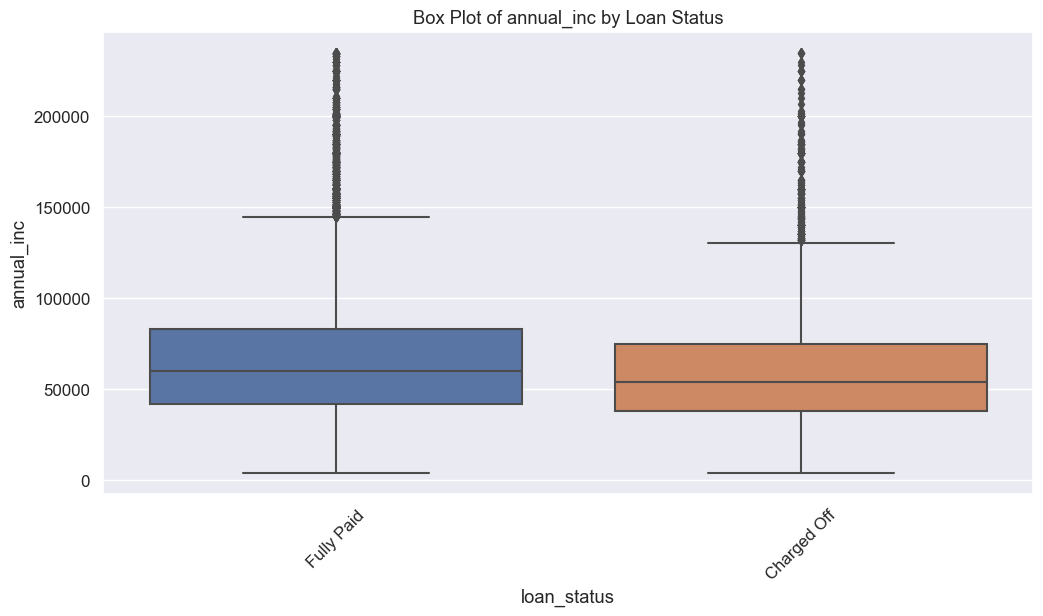

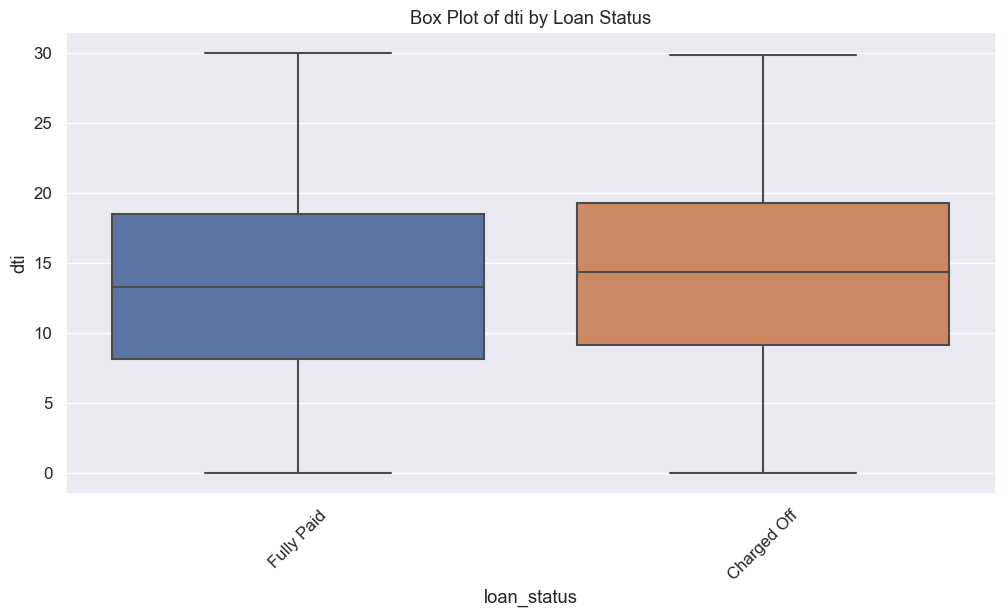

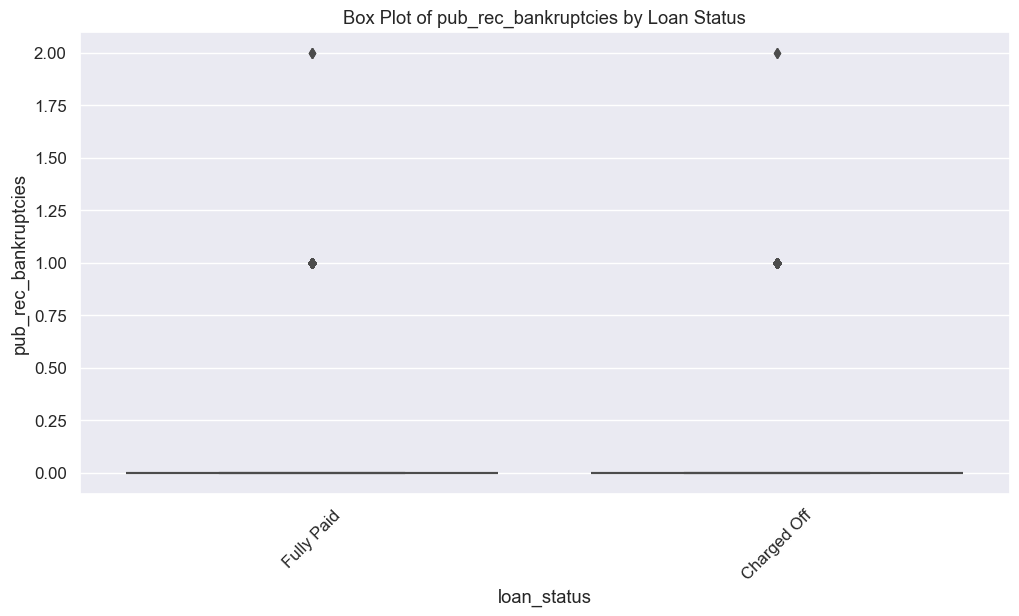

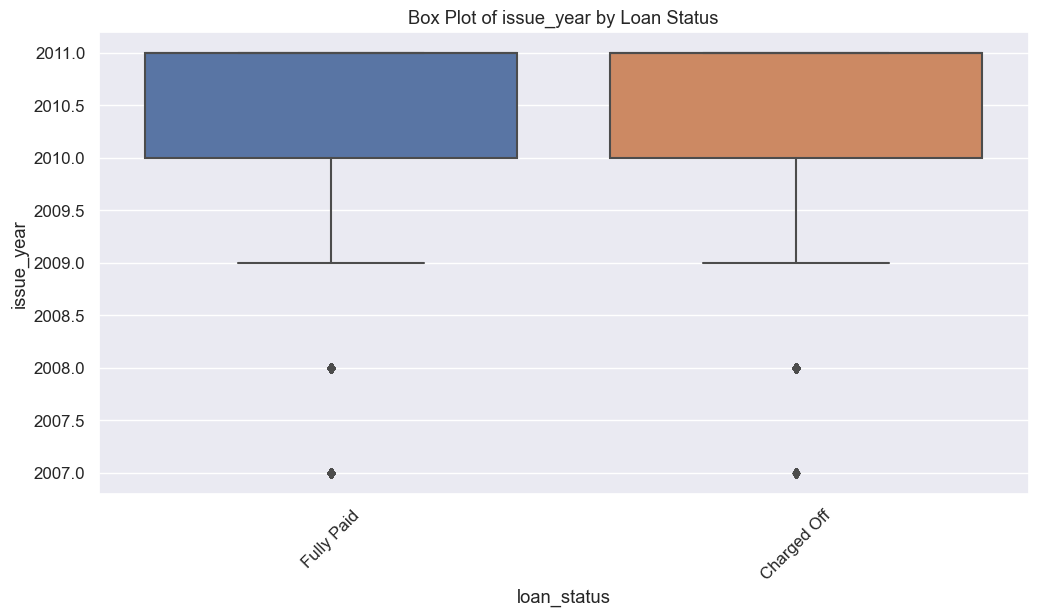

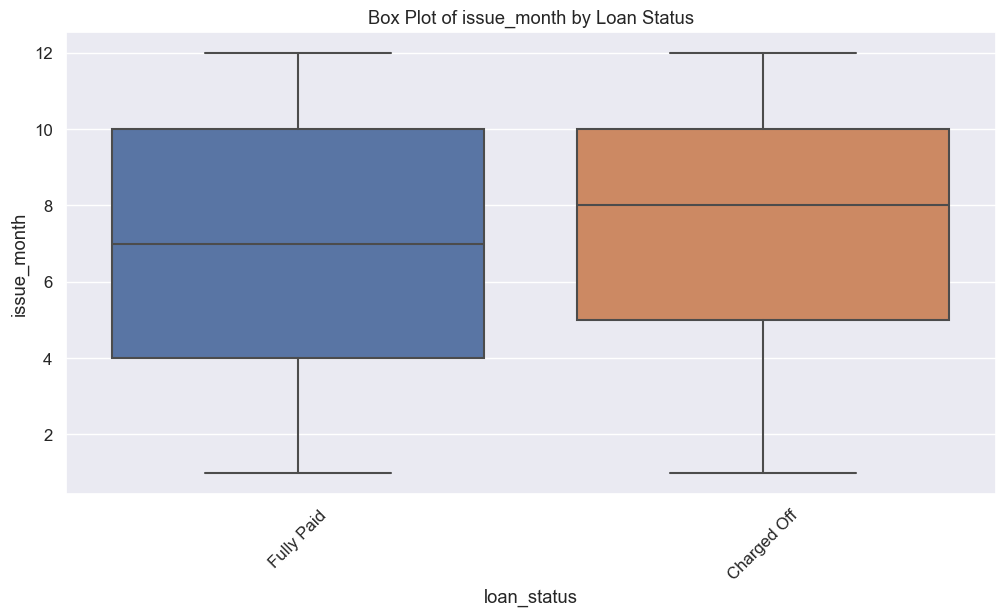

In [195]:
#Since our target is loan_status lets try plotting graph between cotinous columns and loan status
# Continuous columns
continuous_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'issue_year', 'issue_month']

# Box plots for each continuous variable against loan_status
for cont_col in continuous_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=loan_df, x='loan_status', y=cont_col)
    plt.title(f'Box Plot of {cont_col} by Loan Status')
    plt.xticks(rotation=45)
    plt.show()

In [228]:
#Relationship of loan amount with issue month and issue year

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

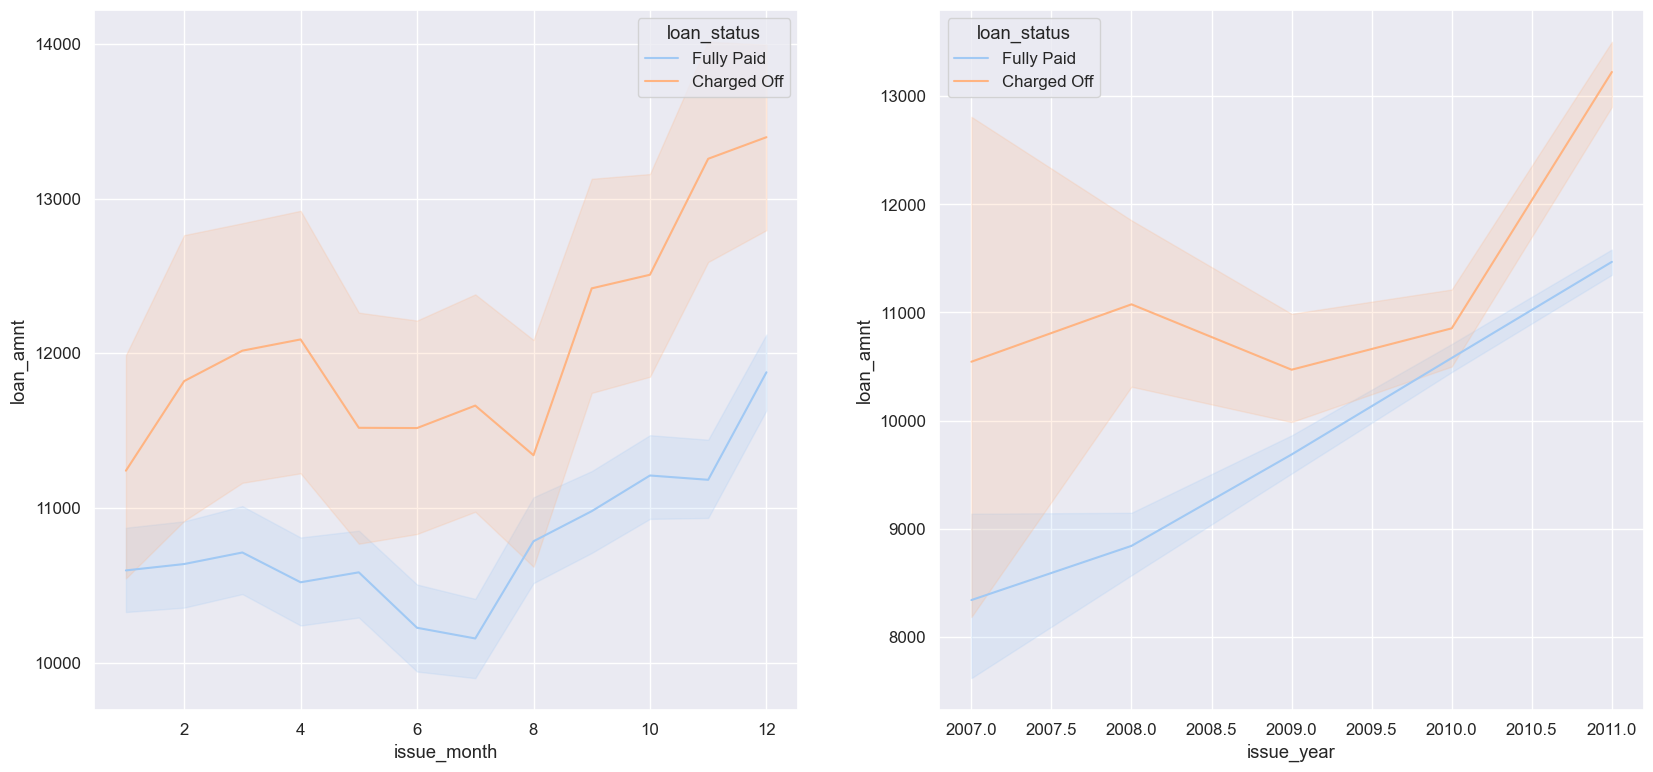

In [205]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

<Axes: xlabel='issue_year', ylabel='count'>

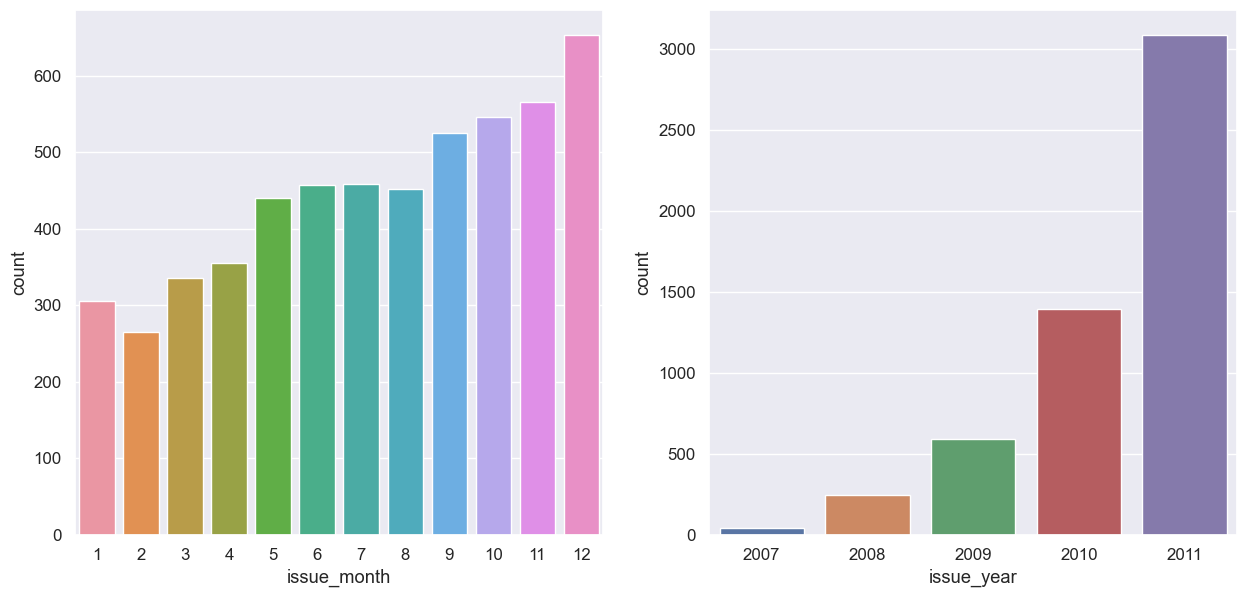

In [207]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_df[loan_df['loan_status']=='Charged Off'])

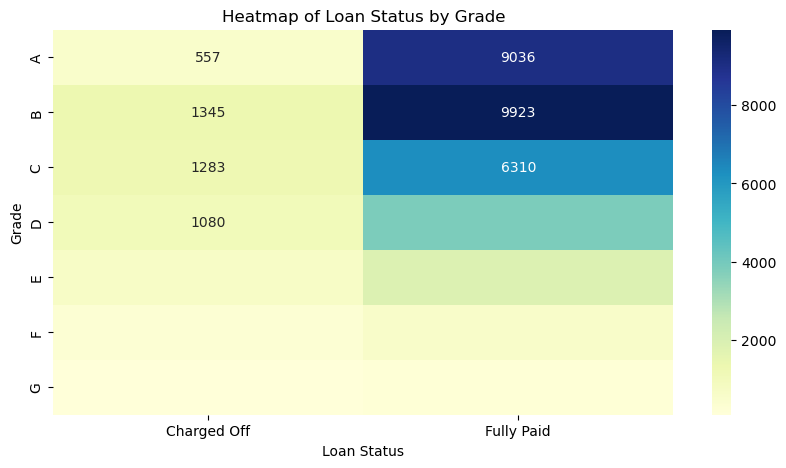

In [161]:
# Cross-tabulation and heatmap of loan status by grade
crosstab = pd.crosstab(loan_df['grade'], loan_df['loan_status'])
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Loan Status by Grade')
plt.xlabel('Loan Status')
plt.ylabel('Grade')
plt.show()


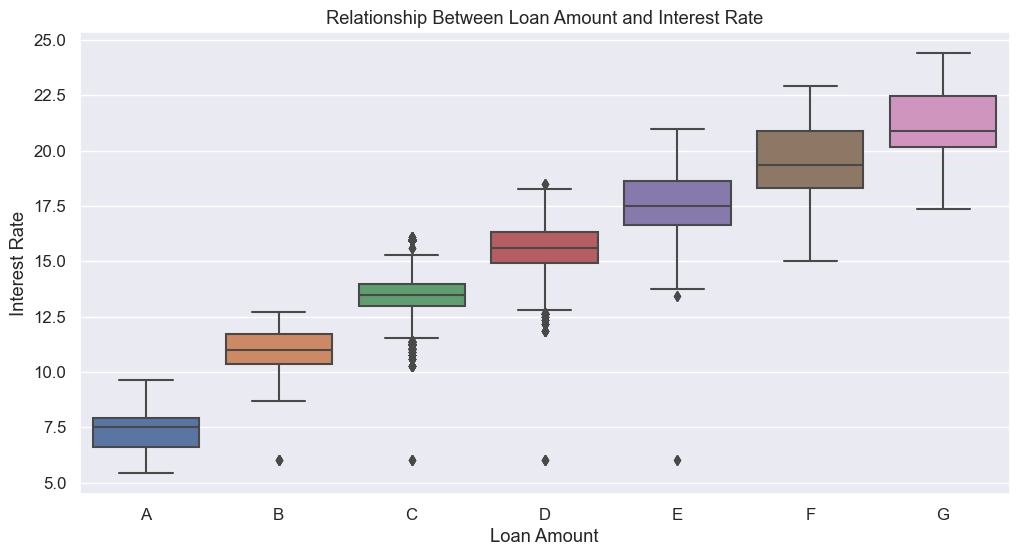

In [193]:
#To further analyse the situation we will now do bi variate analysis by picking two random variable and plot a graph to understand the relationship
# Bivariate analysis: Relationship between interest rate and loan amount
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_df, x='grade', y='int_rate')
plt.title('Relationship Between Loan Amount and Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()


Text(0.5, 1.0, 'Relationship Between Verification Status and Charged Off')

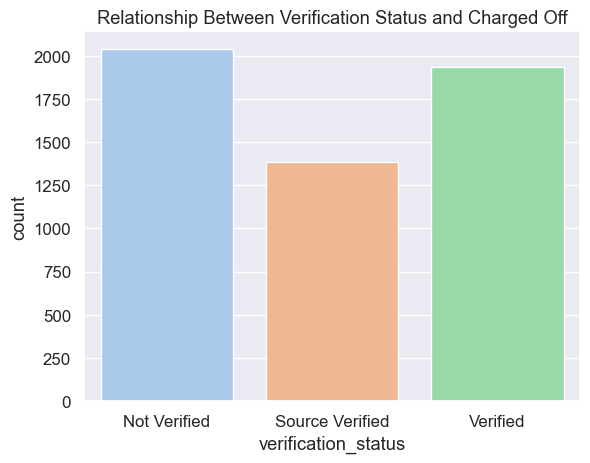

In [230]:
#Relationship Between verification status and charged off
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'],palette='pastel')
plt.title('Relationship Between Verification Status and Charged Off')

In [231]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -
inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1612,7527,9139,0.176387
2,50k to 60k,849,4613,5462,0.155438
1,40k - 50k,826,4713,5539,0.149124
3,60k to 70k,545,3481,4026,0.135370
4,70k to 80k,457,3022,3479,0.131360
5,80k - above,1071,8457,9528,0.112406


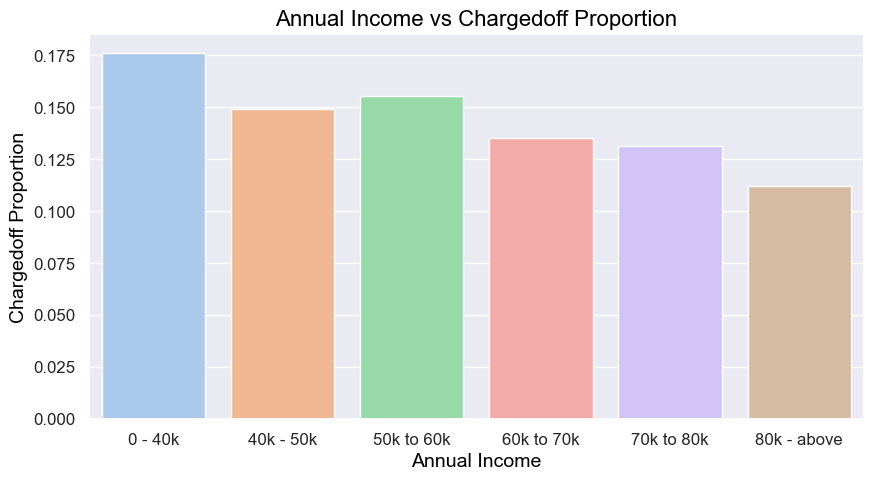

In [232]:
# Let's draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
fig, ax1 = plt.subplots(figsize=(10, 5))  
ax1.set_title('Annual Income vs Chargedoff Proportion', fontsize=16, color='black')
ax1 = sns.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan, palette='pastel') 
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='black')
ax1.set_xlabel('Annual Income', fontsize=14, color='black')
plt.show()

In [233]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -
inc_range_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,98,190,288,0.340278
5,F,307,631,938,0.327292
4,E,690,1879,2569,0.268587
3,D,1080,3844,4924,0.219334
2,C,1283,6310,7593,0.168971
1,B,1345,9923,11268,0.119365
0,A,557,9036,9593,0.058063


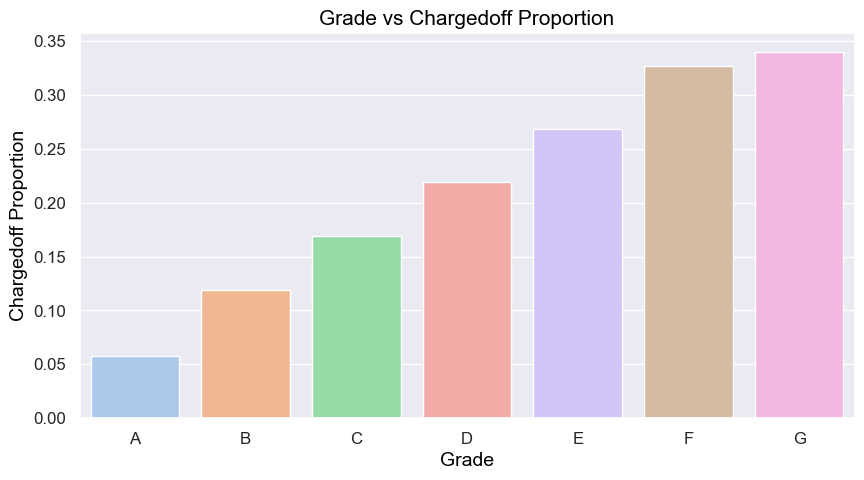

In [191]:
# Let's draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
fig, ax1 = plt.subplots(figsize=(10, 5))  
ax1.set_title('Grade vs Chargedoff Proportion', fontsize=15, color='black')
ax1 = sns.barplot(x='grade', y='Chargedoff_Proportion', data=inc_range_vs_loan, palette='pastel') 
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='black')
ax1.set_xlabel('Grade', fontsize=14, color='black')
plt.show()

Text(0.5, 1.0, 'Relationship between term and charged off')

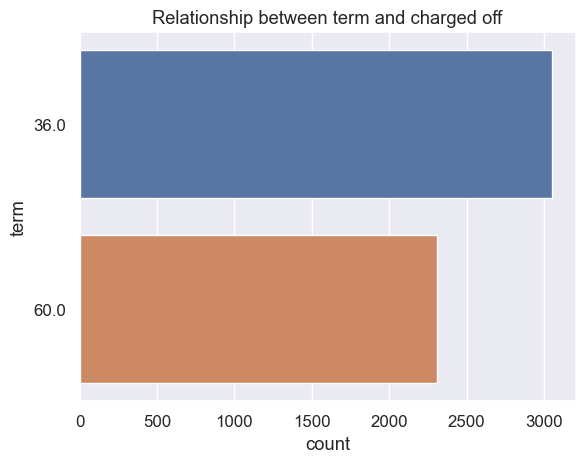

In [234]:
#Relationship between term and charged off
sns.countplot(y='term', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title("Relationship between term and charged off")

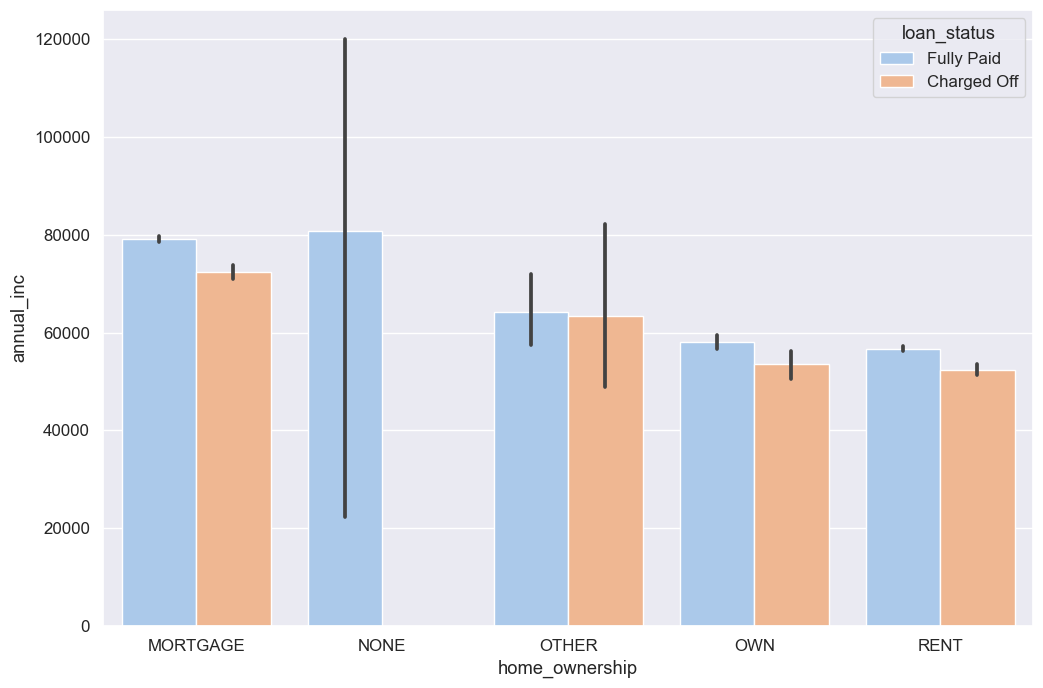

In [235]:
#Relationship between home ownership and annual income
plt.figure(figsize=(12,8))
sns.barplot(data =loan_df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

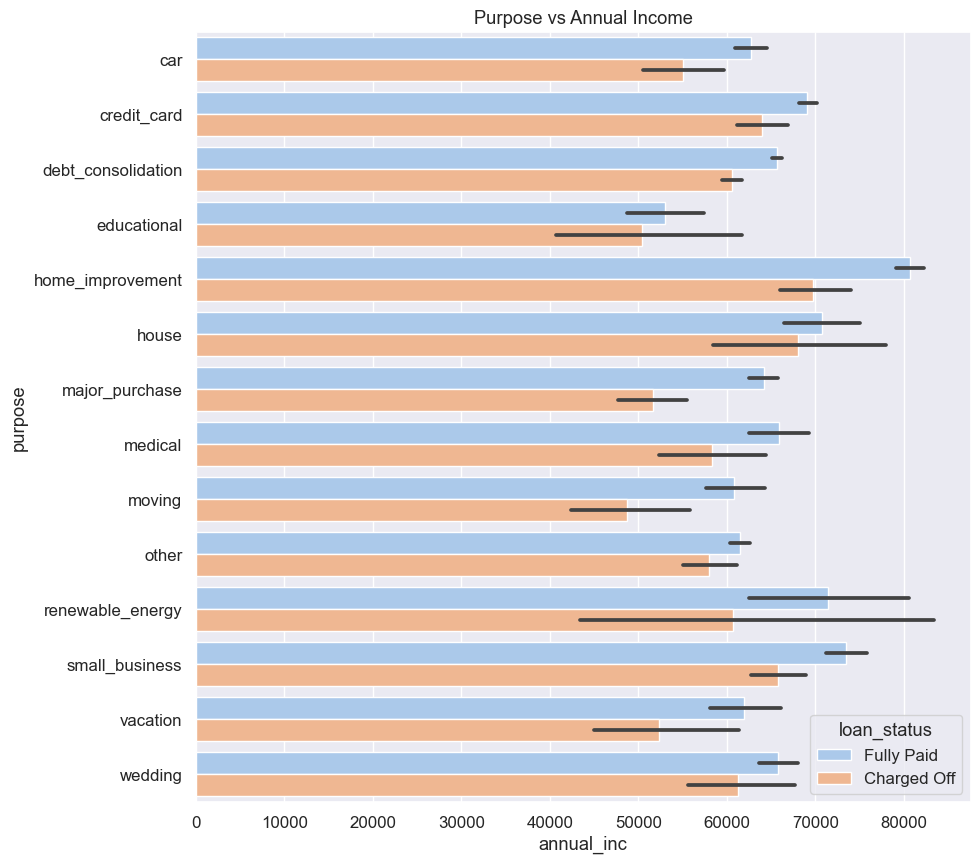

In [236]:
#Relationship between purpose and annual income
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='annual_inc', y='purpose', hue ='loan_status',palette="pastel")
plt.title("Purpose vs Annual Income")
plt.show()

### Bivariate Analysis Observation:
    1. From purpose vs annual income plot we observe that applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses".
    2.Borrowers with high annual income mostly have homes on mortgage.
    3.Borrowers with 36 term has higher chances of fully paying the loan amount.
    4. Grade G has highest record of being charged off.
    5. Borrowers with annual income of less than or equal to 40k are more likely to be charged off.
    6. Most charged off borrowers are non verified.
    7. December month has most issued loans and has highest charged off borrowers.
    8. Borrowers with higher interest rate and loan amount have more chances of being charged off.


## 3.4 Correlation Analysis

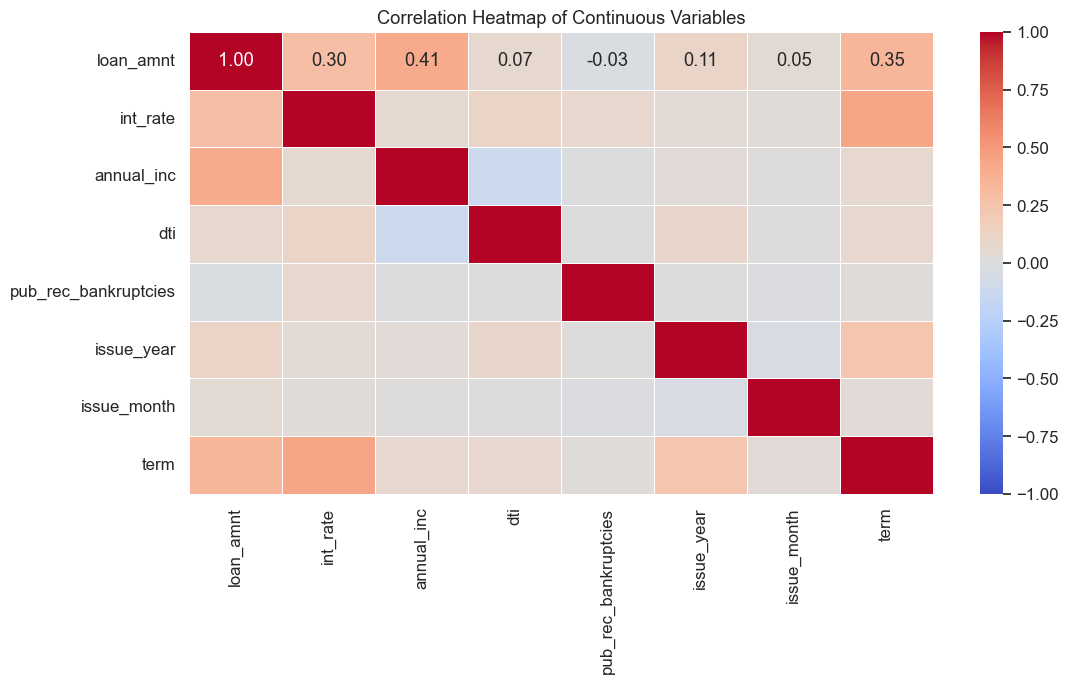

                      loan_amnt  int_rate  annual_inc       dti  \
loan_amnt              1.000000  0.296455    0.412178  0.070918   
int_rate               0.296455  1.000000    0.063253  0.114593   
annual_inc             0.412178  0.063253    1.000000 -0.112099   
dti                    0.070918  0.114593   -0.112099  1.000000   
pub_rec_bankruptcies  -0.028905  0.085265   -0.010598  0.007245   
issue_year             0.113140  0.042691    0.038999  0.093698   
issue_month            0.053429  0.026894    0.015393  0.013096   
term                   0.347447  0.439440    0.072589  0.079515   

                      pub_rec_bankruptcies  issue_year  issue_month      term  
loan_amnt                        -0.028905    0.113140     0.053429  0.347447  
int_rate                          0.085265    0.042691     0.026894  0.439440  
annual_inc                       -0.010598    0.038999     0.015393  0.072589  
dti                               0.007245    0.093698     0.013096  0.07951

In [213]:
# Select continuous columns for correlation analysis
continuous_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'term']

# Convert all columns to numeric types if they are not already
#loan_df[continuous_cols] = loan_df[continuous_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
loan_df.dropna(subset=continuous_cols, inplace=True)

# Compute the correlation matrix
correlation_matrix = loan_df[continuous_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

# Title and labels
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

# Display the correlation matrix
print(correlation_matrix)